# import stuff

In [1]:
import numpy
import xarray
import matplotlib
import matplotlib.pyplot as mp
import datetime
import glob
import netCDF4
import pandas
import wrf
import string
import seaborn
import matplotlib.colors
import cmocean

import cartopy

DEGREE_SIGN = u'\u00B0'
mp.rcParams.update({'mathtext.default': 'regular'})

% matplotlib inline

# open control data

In [7]:
root_dir = '/beegfs/DATA/pritchard/blangenb/WRF_ARCHIVE/CHEYENNE/FMAASO/400_sensitivity/001_with_extras/'
file_list = sorted(glob.glob(root_dir+'/'+'wrfout*'))
ds_list = [netCDF4.Dataset(file) for file in file_list]

In [10]:
cont_mfds = xarray.open_mfdataset(root_dir + '/' + 'wrfout*')

In [11]:
ptot_400 = numpy.load('DATA_ptot_400_sensitivity.npy')
tk_400 = numpy.load('DATA_tk_400_sensitivity.npy')
#ua_400 = numpy.load('DATA_ua_400.npy')
#wa_400 = numpy.load('DATA_wa_400.npy')
geopot_400 = numpy.load('DATA_geopot_400_sensitivity.npy')
mse_400 = numpy.load('DATA_mse_400_sensitivity.npy')

In [12]:
rainc_400 = cont_mfds['RAINC']
rainnc_400 = cont_mfds['RAINNC']
qvapor_400 = cont_mfds['QVAPOR']
w_400 = cont_mfds['W']
u_400 = cont_mfds['U']
pblh_400 = cont_mfds['PBLH']
phb_400 = cont_mfds['PHB']
qcloud_400 = cont_mfds['QCLOUD']
cldfra_400 = cont_mfds['CLDFRA']
deltaysu_400 = cont_mfds['DELTA_YSU']

In [13]:
qrain_400 = cont_mfds['QRAIN']

In [14]:
time = cont_mfds['Times'].values
xlat = cont_mfds['XLAT'].values[0,:,:]
xlong = cont_mfds['XLONG'].values[0,:,:]
landmask = cont_mfds['LANDMASK'].values[0,:,:]
landmask_midpoints = landmask[1:,1:]

# open phys data

In [17]:
root_dir = '/beegfs/DATA/pritchard/blangenb/WRF_ARCHIVE/CHEYENNE/FMAASO/1000_sensitivity/001_with_extras'
file_list = sorted(glob.glob(root_dir+'/'+'wrfout*'))
ds_list = [netCDF4.Dataset(file) for file in file_list]

In [18]:
phys_mfds = xarray.open_mfdataset(root_dir + '/' + 'wrfout*')

In [20]:
ptot_1000 = numpy.load('DATA_ptot_1000_sensitivity.npy')
#ua_1000 = numpy.load('DATA_ua_1000_sensitivity.npy')
#wa_1000 = numpy.load('DATA_wa_1000_sensitivity.npy')
tk_1000 = numpy.load('DATA_tk_1000_sensitivity.npy')
mse_1000 = numpy.load('DATA_mse_1000_sensitivity.npy')

In [21]:
rainc_1000 = phys_mfds['RAINC']
rainnc_1000 = phys_mfds['RAINNC']
qvapor_1000 = phys_mfds['QVAPOR']
w_1000 = phys_mfds['W']
u_1000 = phys_mfds['U']
pblh_1000 = phys_mfds['PBLH']
phb_1000 = phys_mfds['PHB']
qcloud_1000 = phys_mfds['QCLOUD']
cldfra_1000 = phys_mfds['CLDFRA']
deltaysu_1000 = phys_mfds['DELTA_YSU']

In [22]:
qrain_1000 = phys_mfds['QRAIN']

# get time data

In [23]:
time_datetimes = pandas.to_datetime([i.decode('utf-8') for i in time], format = '%Y-%m-%d_%H:%M:%S')

In [12]:
skip_time = 24
n_intervals = 8
hour_strings = ['06','09','12','15','18','21','00','03']
hour_strings_local = ['02', '05', '08', '11', '14', '17','20', '23']

times_00 = [t.hour in [23,0,1] for t in time_datetimes[skip_time:]]
times_03 = [t.hour in [2,3,4] for t in time_datetimes[skip_time:]]
times_06 = [t.hour in [5,6,7] for t in time_datetimes[skip_time:]]
times_09 = [t.hour in [8,9,10] for t in time_datetimes[skip_time:]]
times_12 = [t.hour in [11,12,13] for t in time_datetimes[skip_time:]]
times_15 = [t.hour in [14,15,16] for t in time_datetimes[skip_time:]]
times_18 = [t.hour in [17,18,19] for t in time_datetimes[skip_time:]]
times_21 = [t.hour in [20,21,22] for t in time_datetimes[skip_time:]]

# lat indices

In [13]:
lat_hi = 10.
lat_lo = -10.

# subset between lat_hi and lat_lo
lat_indices = (xlat<=lat_hi)&(xlat>=lat_lo)

In [14]:
g = 9.80665

# PBLH diffs

In [15]:
pblh_diffs = pblh_1000.values-pblh_400.values

# mse

In [175]:
mse_diffs = mse_1000-mse_400

mse_diffs_landmask = numpy.copy(mse_diffs)
mse_diffs_landmask[:,:,landmask==1]=numpy.nan

mse_diffs_lat_subset = mse_diffs[:,:,lat_indices[:,0],:]

mse_400_landmask = numpy.copy(mse_400)
mse_400_landmask[:,:,landmask==1]=numpy.nan

In [176]:
mse_400_lat_subset = mse_400[:,:,lat_indices[:,0],:]
mse_diffs_lat_mean = numpy.nanmean(mse_diffs_lat_subset, axis=2)
mse_400_lat_mean = numpy.nanmean(mse_400_lat_subset, axis=2)

# qvapor

In [16]:
qvapor_diffs = qvapor_1000.values-qvapor_400.values

qvapor_diffs_landmask = numpy.copy(qvapor_diffs)
qvapor_diffs_landmask[:,:,landmask==1]=numpy.nan

qvapor_diffs_lat_subset = qvapor_diffs[:,:,lat_indices[:,0],:]

qvapor_400_landmask = numpy.copy(qvapor_400)
qvapor_400_landmask[:,:,landmask==1]=numpy.nan

In [17]:
qvapor_400_lat_subset = qvapor_400[:,:,lat_indices[:,0],:]
qvapor_diffs_lat_mean = numpy.nanmean(qvapor_diffs_lat_subset, axis=2)
qvapor_400_lat_mean = numpy.nanmean(qvapor_400_lat_subset, axis=2)

# qcloud

In [18]:
qcloud_diffs = qcloud_1000.values-qcloud_400.values

qcloud_diffs_landmask = numpy.copy(qcloud_diffs)
qcloud_diffs_landmask[:,:,landmask==1]=numpy.nan

qcloud_diffs_lat_subset = qcloud_diffs[:,:,lat_indices[:,0],:]

qcloud_400_landmask = numpy.copy(qcloud_400)
qcloud_400_landmask[:,:,landmask==1]=numpy.nan

In [19]:
qcloud_400_lat_subset = qcloud_400[:,:,lat_indices[:,0],:]
qcloud_diffs_lat_mean = numpy.nanmean(qcloud_diffs_lat_subset, axis=2)
qcloud_400_lat_mean = numpy.nanmean(qcloud_400_lat_subset, axis=2)

# qrain

In [139]:
qrain_diffs = qrain_1000.values-qrain_400.values

qrain_diffs_landmask = numpy.copy(qrain_diffs)
qrain_diffs_landmask[:,:,landmask==1]=numpy.nan

qrain_diffs_lat_subset = qrain_diffs[:,:,lat_indices[:,0],:]

qrain_400_landmask = numpy.copy(qrain_400)
qrain_400_landmask[:,:,landmask==1]=numpy.nan

In [140]:
qrain_400_lat_subset = qrain_400[:,:,lat_indices[:,0],:]
qrain_diffs_lat_mean = numpy.nanmean(qrain_diffs_lat_subset, axis=2)
qrain_400_lat_mean = numpy.nanmean(qrain_400_lat_subset, axis=2)

# cldfra

In [20]:
cldfra_diffs = cldfra_1000.values-cldfra_400.values

cldfra_diffs_landmask = numpy.copy(cldfra_diffs)
cldfra_diffs_landmask[:,:,landmask==1]=numpy.nan

cldfra_diffs_lat_subset = cldfra_diffs[:,:,lat_indices[:,0],:]

cldfra_400_landmask = numpy.copy(cldfra_400)
cldfra_400_landmask[:,:,landmask==1]=numpy.nan

In [21]:
cldfra_400_lat_subset = cldfra_400[:,:,lat_indices[:,0],:]
cldfra_diffs_lat_mean = numpy.nanmean(cldfra_diffs_lat_subset, axis=2)
cldfra_400_lat_mean = numpy.nanmean(cldfra_400_lat_subset, axis=2)

# wa and ua diffs

In [22]:
ua_diffs = ua_1000-ua_400
wa_diffs = wa_1000-wa_400

In [23]:
ua_diffs_lat_subset = ua_diffs[:,:,lat_indices[:,0],:]
ua_400_lat_subset = ua_400[:,:,lat_indices[:,0],:]

wa_diffs_lat_subset = wa_diffs[:,:,lat_indices[:,0],:]
wa_400_lat_subset = wa_400[:,:,lat_indices[:,0],:]

In [24]:
ua_diffs_lat_mean = numpy.nanmean(ua_diffs_lat_subset, axis=2)
wa_diffs_lat_mean = numpy.nanmean(wa_diffs_lat_subset, axis=2)

ua_400_lat_mean = numpy.nanmean(ua_400_lat_subset, axis=2)
wa_400_lat_mean = numpy.nanmean(wa_400_lat_subset, axis=2)

# tk

In [25]:
tk_diffs = tk_1000 - tk_400

In [26]:
tk_diffs_lat_subset = tk_diffs[:,:,lat_indices[:,0],:]
tk_400_lat_subset = tk_400[:,:,lat_indices[:,0],:]

In [27]:
tk_diffs_lat_mean = numpy.nanmean(tk_diffs_lat_subset, axis=2)
tk_400_lat_mean = numpy.nanmean(tk_400_lat_subset, axis=2)

# geopotential

In [28]:
geopot_400_landmask = numpy.copy(geopot_400)
geopot_400_landmask[:,:,landmask==1]=numpy.nan

In [29]:
geopot_400_lat_subset = geopot_400[:,:,lat_indices[:,0],:]
geopot_400_lat_mean = numpy.nanmean(geopot_400_lat_subset, axis=2)

# pblh

In [30]:
pblh_diffs_landmask = numpy.copy(pblh_diffs)
pblh_diffs_landmask[:,landmask==0]=numpy.nan

In [31]:
pblh_400_landmask = numpy.copy(pblh_400)
pblh_400_landmask[:,landmask==0]=numpy.nan

In [32]:
pblh_1000_landmask = numpy.copy(pblh_1000)
pblh_1000_landmask[:,landmask==0]=numpy.nan

Set lontidues west of 290º equal to NaN so that Andes don't have a weird boundary layer

In [33]:
lon_lo = 290-360
lon_hi = 320-360
lon_indices = (xlong[0,:]<lon_lo)|(xlong[0,:]>lon_hi)

In [34]:
pblh_diffs_lat_subset = pblh_diffs_landmask[:,lat_indices[:,0],:]
pblh_400_lat_subset = pblh_400_landmask[:,lat_indices[:,0],:]
pblh_1000_lat_subset = pblh_1000_landmask[:,lat_indices[:,0],:]

pblh_400_lat_subset[:,:,lon_indices]=numpy.nan
pblh_1000_lat_subset[:,:,lon_indices]=numpy.nan

In [35]:
pblh_diffs_lat_mean = numpy.nanmean(pblh_diffs_lat_subset, axis=1)
pblh_400_lat_mean = numpy.nanmean(pblh_400_lat_subset, axis=1)
pblh_1000_lat_mean = numpy.nanmean(pblh_1000_lat_subset, axis=1)

/export/home/blangenb/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: Mean of empty slice
  """Entry point for launching an IPython kernel.
/export/home/blangenb/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: Mean of empty slice
  
/export/home/blangenb/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: Mean of empty slice
  This is separate from the ipykernel package so we can avoid doing imports until


# 3 hourly means of ua

In [36]:
ua_400_t00mean = numpy.mean(ua_400_lat_mean[skip_time:,:,:][times_00,:,:], axis=0)
ua_400_t03mean = numpy.mean(ua_400_lat_mean[skip_time:,:,:][times_03,:,:], axis=0)
ua_400_t06mean = numpy.mean(ua_400_lat_mean[skip_time:,:,:][times_06,:,:], axis=0)
ua_400_t09mean = numpy.mean(ua_400_lat_mean[skip_time:,:,:][times_09,:,:], axis=0)
ua_400_t12mean = numpy.mean(ua_400_lat_mean[skip_time:,:,:][times_12,:,:], axis=0)
ua_400_t15mean = numpy.mean(ua_400_lat_mean[skip_time:,:,:][times_15,:,:], axis=0)
ua_400_t18mean = numpy.mean(ua_400_lat_mean[skip_time:,:,:][times_18,:,:], axis=0)
ua_400_t21mean = numpy.mean(ua_400_lat_mean[skip_time:,:,:][times_21,:,:], axis=0)

ua_400_array = numpy.array([ua_400_t06mean, ua_400_t09mean, ua_400_t12mean, ua_400_t15mean, ua_400_t18mean, ua_400_t21mean, ua_400_t00mean, ua_400_t03mean])


In [37]:
# calculate 3 hourly means for 400
ua_diffs_t00mean = numpy.mean(ua_diffs_lat_mean[skip_time:,:,:][times_00,:,:], axis=0)
ua_diffs_t03mean = numpy.mean(ua_diffs_lat_mean[skip_time:,:,:][times_03,:,:], axis=0)
ua_diffs_t06mean = numpy.mean(ua_diffs_lat_mean[skip_time:,:,:][times_06,:,:], axis=0)
ua_diffs_t09mean = numpy.mean(ua_diffs_lat_mean[skip_time:,:,:][times_09,:,:], axis=0)
ua_diffs_t12mean = numpy.mean(ua_diffs_lat_mean[skip_time:,:,:][times_12,:,:], axis=0)
ua_diffs_t15mean = numpy.mean(ua_diffs_lat_mean[skip_time:,:,:][times_15,:,:], axis=0)
ua_diffs_t18mean = numpy.mean(ua_diffs_lat_mean[skip_time:,:,:][times_18,:,:], axis=0)
ua_diffs_t21mean = numpy.mean(ua_diffs_lat_mean[skip_time:,:,:][times_21,:,:], axis=0)

ua_diffs_array = numpy.array([ua_diffs_t06mean, ua_diffs_t09mean, ua_diffs_t12mean, ua_diffs_t15mean, ua_diffs_t18mean, ua_diffs_t21mean, ua_diffs_t00mean, ua_diffs_t03mean])


# 3 hourly means of wa

In [38]:
wa_400_t00mean = numpy.mean(wa_400_lat_mean[skip_time:,:,:][times_00,:,:], axis=0)
wa_400_t03mean = numpy.mean(wa_400_lat_mean[skip_time:,:,:][times_03,:,:], axis=0)
wa_400_t06mean = numpy.mean(wa_400_lat_mean[skip_time:,:,:][times_06,:,:], axis=0)
wa_400_t09mean = numpy.mean(wa_400_lat_mean[skip_time:,:,:][times_09,:,:], axis=0)
wa_400_t12mean = numpy.mean(wa_400_lat_mean[skip_time:,:,:][times_12,:,:], axis=0)
wa_400_t15mean = numpy.mean(wa_400_lat_mean[skip_time:,:,:][times_15,:,:], axis=0)
wa_400_t18mean = numpy.mean(wa_400_lat_mean[skip_time:,:,:][times_18,:,:], axis=0)
wa_400_t21mean = numpy.mean(wa_400_lat_mean[skip_time:,:,:][times_21,:,:], axis=0)

wa_400_array = numpy.array([wa_400_t06mean, wa_400_t09mean, wa_400_t12mean, wa_400_t15mean, wa_400_t18mean, wa_400_t21mean, wa_400_t00mean, wa_400_t03mean])


In [39]:
# calculate 3 hourly means for 400
wa_diffs_t00mean = numpy.mean(wa_diffs_lat_mean[skip_time:,:,:][times_00,:,:], axis=0)
wa_diffs_t03mean = numpy.mean(wa_diffs_lat_mean[skip_time:,:,:][times_03,:,:], axis=0)
wa_diffs_t06mean = numpy.mean(wa_diffs_lat_mean[skip_time:,:,:][times_06,:,:], axis=0)
wa_diffs_t09mean = numpy.mean(wa_diffs_lat_mean[skip_time:,:,:][times_09,:,:], axis=0)
wa_diffs_t12mean = numpy.mean(wa_diffs_lat_mean[skip_time:,:,:][times_12,:,:], axis=0)
wa_diffs_t15mean = numpy.mean(wa_diffs_lat_mean[skip_time:,:,:][times_15,:,:], axis=0)
wa_diffs_t18mean = numpy.mean(wa_diffs_lat_mean[skip_time:,:,:][times_18,:,:], axis=0)
wa_diffs_t21mean = numpy.mean(wa_diffs_lat_mean[skip_time:,:,:][times_21,:,:], axis=0)

wa_diffs_array = numpy.array([wa_diffs_t06mean, wa_diffs_t09mean, wa_diffs_t12mean, wa_diffs_t15mean, wa_diffs_t18mean, wa_diffs_t21mean, wa_diffs_t00mean, wa_diffs_t03mean])


# 3 hourly means of tk

In [40]:
tk_400_t00mean = numpy.mean(tk_400_lat_mean[skip_time:,:,:][times_00,:,:], axis=0)
tk_400_t03mean = numpy.mean(tk_400_lat_mean[skip_time:,:,:][times_03,:,:], axis=0)
tk_400_t06mean = numpy.mean(tk_400_lat_mean[skip_time:,:,:][times_06,:,:], axis=0)
tk_400_t09mean = numpy.mean(tk_400_lat_mean[skip_time:,:,:][times_09,:,:], axis=0)
tk_400_t12mean = numpy.mean(tk_400_lat_mean[skip_time:,:,:][times_12,:,:], axis=0)
tk_400_t15mean = numpy.mean(tk_400_lat_mean[skip_time:,:,:][times_15,:,:], axis=0)
tk_400_t18mean = numpy.mean(tk_400_lat_mean[skip_time:,:,:][times_18,:,:], axis=0)
tk_400_t21mean = numpy.mean(tk_400_lat_mean[skip_time:,:,:][times_21,:,:], axis=0)

tk_400_array = numpy.array([tk_400_t06mean, tk_400_t09mean, tk_400_t12mean, tk_400_t15mean, tk_400_t18mean, tk_400_t21mean, tk_400_t00mean, tk_400_t03mean])


In [41]:
# calculate 3 hourly means for 400
tk_diffs_t00mean = numpy.mean(tk_diffs_lat_mean[skip_time:,:,:][times_00,:,:], axis=0)
tk_diffs_t03mean = numpy.mean(tk_diffs_lat_mean[skip_time:,:,:][times_03,:,:], axis=0)
tk_diffs_t06mean = numpy.mean(tk_diffs_lat_mean[skip_time:,:,:][times_06,:,:], axis=0)
tk_diffs_t09mean = numpy.mean(tk_diffs_lat_mean[skip_time:,:,:][times_09,:,:], axis=0)
tk_diffs_t12mean = numpy.mean(tk_diffs_lat_mean[skip_time:,:,:][times_12,:,:], axis=0)
tk_diffs_t15mean = numpy.mean(tk_diffs_lat_mean[skip_time:,:,:][times_15,:,:], axis=0)
tk_diffs_t18mean = numpy.mean(tk_diffs_lat_mean[skip_time:,:,:][times_18,:,:], axis=0)
tk_diffs_t21mean = numpy.mean(tk_diffs_lat_mean[skip_time:,:,:][times_21,:,:], axis=0)

tk_diffs_array = numpy.array([tk_diffs_t06mean, tk_diffs_t09mean, tk_diffs_t12mean, tk_diffs_t15mean, tk_diffs_t18mean, tk_diffs_t21mean, tk_diffs_t00mean, tk_diffs_t03mean])


# 3 hourly means of mse

In [177]:
mse_400_t00mean = numpy.mean(mse_400_lat_mean[skip_time:,:,:][times_00,:,:], axis=0)
mse_400_t03mean = numpy.mean(mse_400_lat_mean[skip_time:,:,:][times_03,:,:], axis=0)
mse_400_t06mean = numpy.mean(mse_400_lat_mean[skip_time:,:,:][times_06,:,:], axis=0)
mse_400_t09mean = numpy.mean(mse_400_lat_mean[skip_time:,:,:][times_09,:,:], axis=0)
mse_400_t12mean = numpy.mean(mse_400_lat_mean[skip_time:,:,:][times_12,:,:], axis=0)
mse_400_t15mean = numpy.mean(mse_400_lat_mean[skip_time:,:,:][times_15,:,:], axis=0)
mse_400_t18mean = numpy.mean(mse_400_lat_mean[skip_time:,:,:][times_18,:,:], axis=0)
mse_400_t21mean = numpy.mean(mse_400_lat_mean[skip_time:,:,:][times_21,:,:], axis=0)

mse_400_array = numpy.array([mse_400_t06mean, mse_400_t09mean, mse_400_t12mean, mse_400_t15mean, mse_400_t18mean, mse_400_t21mean, mse_400_t00mean, mse_400_t03mean])


In [178]:
# calculate 3 hourly means for 400
mse_diffs_t00mean = numpy.mean(mse_diffs_lat_mean[skip_time:,:,:][times_00,:,:], axis=0)
mse_diffs_t03mean = numpy.mean(mse_diffs_lat_mean[skip_time:,:,:][times_03,:,:], axis=0)
mse_diffs_t06mean = numpy.mean(mse_diffs_lat_mean[skip_time:,:,:][times_06,:,:], axis=0)
mse_diffs_t09mean = numpy.mean(mse_diffs_lat_mean[skip_time:,:,:][times_09,:,:], axis=0)
mse_diffs_t12mean = numpy.mean(mse_diffs_lat_mean[skip_time:,:,:][times_12,:,:], axis=0)
mse_diffs_t15mean = numpy.mean(mse_diffs_lat_mean[skip_time:,:,:][times_15,:,:], axis=0)
mse_diffs_t18mean = numpy.mean(mse_diffs_lat_mean[skip_time:,:,:][times_18,:,:], axis=0)
mse_diffs_t21mean = numpy.mean(mse_diffs_lat_mean[skip_time:,:,:][times_21,:,:], axis=0)

mse_diffs_array = numpy.array([mse_diffs_t06mean, mse_diffs_t09mean, mse_diffs_t12mean, mse_diffs_t15mean, mse_diffs_t18mean, mse_diffs_t21mean, mse_diffs_t00mean, mse_diffs_t03mean])


# 3 hourly means of qvapor

In [42]:
qvapor_400_t00mean = numpy.mean(qvapor_400_lat_mean[skip_time:,:,:][times_00,:,:], axis=0)
qvapor_400_t03mean = numpy.mean(qvapor_400_lat_mean[skip_time:,:,:][times_03,:,:], axis=0)
qvapor_400_t06mean = numpy.mean(qvapor_400_lat_mean[skip_time:,:,:][times_06,:,:], axis=0)
qvapor_400_t09mean = numpy.mean(qvapor_400_lat_mean[skip_time:,:,:][times_09,:,:], axis=0)
qvapor_400_t12mean = numpy.mean(qvapor_400_lat_mean[skip_time:,:,:][times_12,:,:], axis=0)
qvapor_400_t15mean = numpy.mean(qvapor_400_lat_mean[skip_time:,:,:][times_15,:,:], axis=0)
qvapor_400_t18mean = numpy.mean(qvapor_400_lat_mean[skip_time:,:,:][times_18,:,:], axis=0)
qvapor_400_t21mean = numpy.mean(qvapor_400_lat_mean[skip_time:,:,:][times_21,:,:], axis=0)

qvapor_400_array = numpy.array([qvapor_400_t06mean, qvapor_400_t09mean, qvapor_400_t12mean, qvapor_400_t15mean, qvapor_400_t18mean, qvapor_400_t21mean, qvapor_400_t00mean, qvapor_400_t03mean])


In [43]:
# calculate 3 hourly means for 400
qvapor_diffs_t00mean = numpy.mean(qvapor_diffs_lat_mean[skip_time:,:,:][times_00,:,:], axis=0)
qvapor_diffs_t03mean = numpy.mean(qvapor_diffs_lat_mean[skip_time:,:,:][times_03,:,:], axis=0)
qvapor_diffs_t06mean = numpy.mean(qvapor_diffs_lat_mean[skip_time:,:,:][times_06,:,:], axis=0)
qvapor_diffs_t09mean = numpy.mean(qvapor_diffs_lat_mean[skip_time:,:,:][times_09,:,:], axis=0)
qvapor_diffs_t12mean = numpy.mean(qvapor_diffs_lat_mean[skip_time:,:,:][times_12,:,:], axis=0)
qvapor_diffs_t15mean = numpy.mean(qvapor_diffs_lat_mean[skip_time:,:,:][times_15,:,:], axis=0)
qvapor_diffs_t18mean = numpy.mean(qvapor_diffs_lat_mean[skip_time:,:,:][times_18,:,:], axis=0)
qvapor_diffs_t21mean = numpy.mean(qvapor_diffs_lat_mean[skip_time:,:,:][times_21,:,:], axis=0)

qvapor_diffs_array = numpy.array([qvapor_diffs_t06mean, qvapor_diffs_t09mean, qvapor_diffs_t12mean, qvapor_diffs_t15mean, qvapor_diffs_t18mean, qvapor_diffs_t21mean, qvapor_diffs_t00mean, qvapor_diffs_t03mean])


# 3 hourly means of qrain

In [141]:
qrain_400_t00mean = numpy.mean(qrain_400_lat_mean[skip_time:,:,:][times_00,:,:], axis=0)
qrain_400_t03mean = numpy.mean(qrain_400_lat_mean[skip_time:,:,:][times_03,:,:], axis=0)
qrain_400_t06mean = numpy.mean(qrain_400_lat_mean[skip_time:,:,:][times_06,:,:], axis=0)
qrain_400_t09mean = numpy.mean(qrain_400_lat_mean[skip_time:,:,:][times_09,:,:], axis=0)
qrain_400_t12mean = numpy.mean(qrain_400_lat_mean[skip_time:,:,:][times_12,:,:], axis=0)
qrain_400_t15mean = numpy.mean(qrain_400_lat_mean[skip_time:,:,:][times_15,:,:], axis=0)
qrain_400_t18mean = numpy.mean(qrain_400_lat_mean[skip_time:,:,:][times_18,:,:], axis=0)
qrain_400_t21mean = numpy.mean(qrain_400_lat_mean[skip_time:,:,:][times_21,:,:], axis=0)

qrain_400_array = numpy.array([qrain_400_t06mean, qrain_400_t09mean, qrain_400_t12mean, qrain_400_t15mean, qrain_400_t18mean, qrain_400_t21mean, qrain_400_t00mean, qrain_400_t03mean])


In [142]:
# calculate 3 hourly means for 400
qrain_diffs_t00mean = numpy.mean(qrain_diffs_lat_mean[skip_time:,:,:][times_00,:,:], axis=0)
qrain_diffs_t03mean = numpy.mean(qrain_diffs_lat_mean[skip_time:,:,:][times_03,:,:], axis=0)
qrain_diffs_t06mean = numpy.mean(qrain_diffs_lat_mean[skip_time:,:,:][times_06,:,:], axis=0)
qrain_diffs_t09mean = numpy.mean(qrain_diffs_lat_mean[skip_time:,:,:][times_09,:,:], axis=0)
qrain_diffs_t12mean = numpy.mean(qrain_diffs_lat_mean[skip_time:,:,:][times_12,:,:], axis=0)
qrain_diffs_t15mean = numpy.mean(qrain_diffs_lat_mean[skip_time:,:,:][times_15,:,:], axis=0)
qrain_diffs_t18mean = numpy.mean(qrain_diffs_lat_mean[skip_time:,:,:][times_18,:,:], axis=0)
qrain_diffs_t21mean = numpy.mean(qrain_diffs_lat_mean[skip_time:,:,:][times_21,:,:], axis=0)

qrain_diffs_array = numpy.array([qrain_diffs_t06mean, qrain_diffs_t09mean, qrain_diffs_t12mean, qrain_diffs_t15mean, qrain_diffs_t18mean, qrain_diffs_t21mean, qrain_diffs_t00mean, qrain_diffs_t03mean])


# 3 hourly means of qcloud

In [44]:
qcloud_400_t00mean = numpy.mean(qcloud_400_lat_mean[skip_time:,:,:][times_00,:,:], axis=0)
qcloud_400_t03mean = numpy.mean(qcloud_400_lat_mean[skip_time:,:,:][times_03,:,:], axis=0)
qcloud_400_t06mean = numpy.mean(qcloud_400_lat_mean[skip_time:,:,:][times_06,:,:], axis=0)
qcloud_400_t09mean = numpy.mean(qcloud_400_lat_mean[skip_time:,:,:][times_09,:,:], axis=0)
qcloud_400_t12mean = numpy.mean(qcloud_400_lat_mean[skip_time:,:,:][times_12,:,:], axis=0)
qcloud_400_t15mean = numpy.mean(qcloud_400_lat_mean[skip_time:,:,:][times_15,:,:], axis=0)
qcloud_400_t18mean = numpy.mean(qcloud_400_lat_mean[skip_time:,:,:][times_18,:,:], axis=0)
qcloud_400_t21mean = numpy.mean(qcloud_400_lat_mean[skip_time:,:,:][times_21,:,:], axis=0)

qcloud_400_array = numpy.array([qcloud_400_t06mean, qcloud_400_t09mean, qcloud_400_t12mean, qcloud_400_t15mean, qcloud_400_t18mean, qcloud_400_t21mean, qcloud_400_t00mean, qcloud_400_t03mean])


In [45]:
# calculate 3 hourly means for 400
qcloud_diffs_t00mean = numpy.mean(qcloud_diffs_lat_mean[skip_time:,:,:][times_00,:,:], axis=0)
qcloud_diffs_t03mean = numpy.mean(qcloud_diffs_lat_mean[skip_time:,:,:][times_03,:,:], axis=0)
qcloud_diffs_t06mean = numpy.mean(qcloud_diffs_lat_mean[skip_time:,:,:][times_06,:,:], axis=0)
qcloud_diffs_t09mean = numpy.mean(qcloud_diffs_lat_mean[skip_time:,:,:][times_09,:,:], axis=0)
qcloud_diffs_t12mean = numpy.mean(qcloud_diffs_lat_mean[skip_time:,:,:][times_12,:,:], axis=0)
qcloud_diffs_t15mean = numpy.mean(qcloud_diffs_lat_mean[skip_time:,:,:][times_15,:,:], axis=0)
qcloud_diffs_t18mean = numpy.mean(qcloud_diffs_lat_mean[skip_time:,:,:][times_18,:,:], axis=0)
qcloud_diffs_t21mean = numpy.mean(qcloud_diffs_lat_mean[skip_time:,:,:][times_21,:,:], axis=0)

qcloud_diffs_array = numpy.array([qcloud_diffs_t06mean, qcloud_diffs_t09mean, qcloud_diffs_t12mean, qcloud_diffs_t15mean, qcloud_diffs_t18mean, qcloud_diffs_t21mean, qcloud_diffs_t00mean, qcloud_diffs_t03mean])


# 3 hourly cldfra means

In [46]:
cldfra_400_t00mean = numpy.mean(cldfra_400_lat_mean[skip_time:,:,:][times_00,:,:], axis=0)
cldfra_400_t03mean = numpy.mean(cldfra_400_lat_mean[skip_time:,:,:][times_03,:,:], axis=0)
cldfra_400_t06mean = numpy.mean(cldfra_400_lat_mean[skip_time:,:,:][times_06,:,:], axis=0)
cldfra_400_t09mean = numpy.mean(cldfra_400_lat_mean[skip_time:,:,:][times_09,:,:], axis=0)
cldfra_400_t12mean = numpy.mean(cldfra_400_lat_mean[skip_time:,:,:][times_12,:,:], axis=0)
cldfra_400_t15mean = numpy.mean(cldfra_400_lat_mean[skip_time:,:,:][times_15,:,:], axis=0)
cldfra_400_t18mean = numpy.mean(cldfra_400_lat_mean[skip_time:,:,:][times_18,:,:], axis=0)
cldfra_400_t21mean = numpy.mean(cldfra_400_lat_mean[skip_time:,:,:][times_21,:,:], axis=0)

cldfra_400_array = numpy.array([cldfra_400_t06mean, cldfra_400_t09mean, cldfra_400_t12mean, cldfra_400_t15mean, cldfra_400_t18mean, cldfra_400_t21mean, cldfra_400_t00mean, cldfra_400_t03mean])


In [47]:
# calculate 3 hourly means for 400
cldfra_diffs_t00mean = numpy.mean(cldfra_diffs_lat_mean[skip_time:,:,:][times_00,:,:], axis=0)
cldfra_diffs_t03mean = numpy.mean(cldfra_diffs_lat_mean[skip_time:,:,:][times_03,:,:], axis=0)
cldfra_diffs_t06mean = numpy.mean(cldfra_diffs_lat_mean[skip_time:,:,:][times_06,:,:], axis=0)
cldfra_diffs_t09mean = numpy.mean(cldfra_diffs_lat_mean[skip_time:,:,:][times_09,:,:], axis=0)
cldfra_diffs_t12mean = numpy.mean(cldfra_diffs_lat_mean[skip_time:,:,:][times_12,:,:], axis=0)
cldfra_diffs_t15mean = numpy.mean(cldfra_diffs_lat_mean[skip_time:,:,:][times_15,:,:], axis=0)
cldfra_diffs_t18mean = numpy.mean(cldfra_diffs_lat_mean[skip_time:,:,:][times_18,:,:], axis=0)
cldfra_diffs_t21mean = numpy.mean(cldfra_diffs_lat_mean[skip_time:,:,:][times_21,:,:], axis=0)

cldfra_diffs_array = numpy.array([cldfra_diffs_t06mean, cldfra_diffs_t09mean, cldfra_diffs_t12mean, cldfra_diffs_t15mean, cldfra_diffs_t18mean, cldfra_diffs_t21mean, cldfra_diffs_t00mean, cldfra_diffs_t03mean])


# 3 hourly means of pblh

In [48]:
# calculate 3 hourly means for 400
pblh_400_t00mean = numpy.mean(pblh_400_lat_mean[skip_time:][times_00,:], axis=0)
pblh_400_t03mean = numpy.mean(pblh_400_lat_mean[skip_time:][times_03,:], axis=0)
pblh_400_t06mean = numpy.mean(pblh_400_lat_mean[skip_time:][times_06,:], axis=0)
pblh_400_t09mean = numpy.mean(pblh_400_lat_mean[skip_time:][times_09,:], axis=0)
pblh_400_t12mean = numpy.mean(pblh_400_lat_mean[skip_time:][times_12,:], axis=0)
pblh_400_t15mean = numpy.mean(pblh_400_lat_mean[skip_time:][times_15,:], axis=0)
pblh_400_t18mean = numpy.mean(pblh_400_lat_mean[skip_time:][times_18,:], axis=0)
pblh_400_t21mean = numpy.mean(pblh_400_lat_mean[skip_time:][times_21,:], axis=0)

pblh_1000_t00mean = numpy.mean(pblh_1000_lat_mean[skip_time:][times_00,:], axis=0)
pblh_1000_t03mean = numpy.mean(pblh_1000_lat_mean[skip_time:][times_03,:], axis=0)
pblh_1000_t06mean = numpy.mean(pblh_1000_lat_mean[skip_time:][times_06,:], axis=0)
pblh_1000_t09mean = numpy.mean(pblh_1000_lat_mean[skip_time:][times_09,:], axis=0)
pblh_1000_t12mean = numpy.mean(pblh_1000_lat_mean[skip_time:][times_12,:], axis=0)
pblh_1000_t15mean = numpy.mean(pblh_1000_lat_mean[skip_time:][times_15,:], axis=0)
pblh_1000_t18mean = numpy.mean(pblh_1000_lat_mean[skip_time:][times_18,:], axis=0)
pblh_1000_t21mean = numpy.mean(pblh_1000_lat_mean[skip_time:][times_21,:], axis=0)

pblh_400_array = numpy.array([pblh_400_t06mean, pblh_400_t09mean, pblh_400_t12mean, pblh_400_t15mean, pblh_400_t18mean, pblh_400_t21mean, pblh_400_t00mean, pblh_400_t03mean])
pblh_1000_array = numpy.array([pblh_1000_t06mean, pblh_1000_t09mean, pblh_1000_t12mean, pblh_1000_t15mean, pblh_1000_t18mean, pblh_1000_t21mean, pblh_1000_t00mean, pblh_1000_t03mean])


In [49]:
# calculate 3 hourly means for 400
pblh_diffs_t00mean = numpy.mean(pblh_diffs_landmask[skip_time:,:,:][times_00,:,:], axis=0)
pblh_diffs_t03mean = numpy.mean(pblh_diffs_landmask[skip_time:,:,:][times_03,:,:], axis=0)
pblh_diffs_t06mean = numpy.mean(pblh_diffs_landmask[skip_time:,:,:][times_06,:,:], axis=0)
pblh_diffs_t09mean = numpy.mean(pblh_diffs_landmask[skip_time:,:,:][times_09,:,:], axis=0)
pblh_diffs_t12mean = numpy.mean(pblh_diffs_landmask[skip_time:,:,:][times_12,:,:], axis=0)
pblh_diffs_t15mean = numpy.mean(pblh_diffs_landmask[skip_time:,:,:][times_15,:,:], axis=0)
pblh_diffs_t18mean = numpy.mean(pblh_diffs_landmask[skip_time:,:,:][times_18,:,:], axis=0)
pblh_diffs_t21mean = numpy.mean(pblh_diffs_landmask[skip_time:,:,:][times_21,:,:], axis=0)

pblh_diffs_2d_array = numpy.array([pblh_diffs_t06mean, pblh_diffs_t09mean, pblh_diffs_t12mean, pblh_diffs_t15mean, pblh_diffs_t18mean, pblh_diffs_t21mean, pblh_diffs_t00mean, pblh_diffs_t03mean])


In [50]:
# calculate 3 hourly means for 400
pblh_400_t00mean = numpy.mean(pblh_400_landmask[skip_time:,:,:][times_00,:,:], axis=0)
pblh_400_t03mean = numpy.mean(pblh_400_landmask[skip_time:,:,:][times_03,:,:], axis=0)
pblh_400_t06mean = numpy.mean(pblh_400_landmask[skip_time:,:,:][times_06,:,:], axis=0)
pblh_400_t09mean = numpy.mean(pblh_400_landmask[skip_time:,:,:][times_09,:,:], axis=0)
pblh_400_t12mean = numpy.mean(pblh_400_landmask[skip_time:,:,:][times_12,:,:], axis=0)
pblh_400_t15mean = numpy.mean(pblh_400_landmask[skip_time:,:,:][times_15,:,:], axis=0)
pblh_400_t18mean = numpy.mean(pblh_400_landmask[skip_time:,:,:][times_18,:,:], axis=0)
pblh_400_t21mean = numpy.mean(pblh_400_landmask[skip_time:,:,:][times_21,:,:], axis=0)

pblh_400_2d_array = numpy.array([pblh_400_t06mean, pblh_400_t09mean, pblh_400_t12mean, pblh_400_t15mean, pblh_400_t18mean, pblh_400_t21mean, pblh_400_t00mean, pblh_400_t03mean])


## create grid

In [51]:
xx,zz=numpy.meshgrid(xlong[0,:],geopot_400_lat_mean[0,:,:].mean(axis=1)/10000.)

plot qvapor and wind climatologies

In [52]:
# make color map
minval=0. # for inferno:  0.18
maxval=0.95 # for inferno: 1.0
n=256
full_cmap = mp.get_cmap('YlGnBu')
cmap_partial = matplotlib.colors.LinearSegmentedColormap.from_list(\
    'trunc({n},{a:.2f},{b:.2f})'.format(n=full_cmap.name, a=minval, b=maxval),\
    full_cmap(numpy.linspace(minval, maxval, n)))

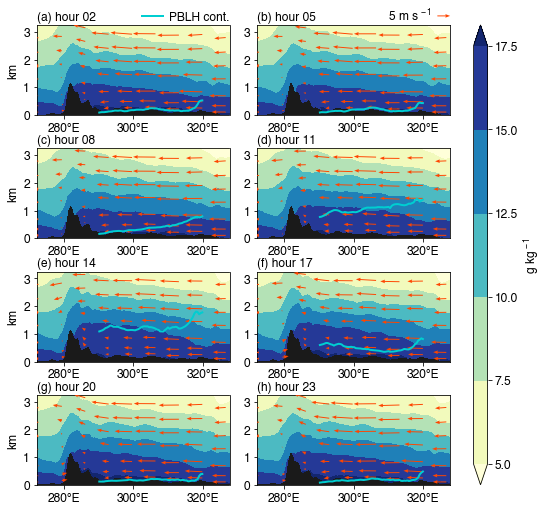

In [54]:
fontsize=12

#nrows=4;ncols=2
#fig,axes = mp.subplots(nrows=nrows,ncols=ncols,subplot_kw={'projection': cartopy.crs.PlateCarree()})
#fig.set_size_inches(3.25,4)

fig = mp.figure(figsize=(6.5,7))

y_zero = numpy.zeros(xlong.shape[1])
levels = numpy.arange(5,17.51,2.5)

xticks_deg_E=numpy.array((280,300,320))
xticks = -(360-xticks_deg_E)
xticks_format=[str(tick)+DEGREE_SIGN+'E' for tick in xticks_deg_E]

z_indices=[1,3,5,7,8,9,10,11,12,13,14,15,16]
every_nth_lon=15
every_nth_z=1
quiver_scale = 1.5 # 0.05 for 850-600, 0.1 for below 850
quiver_shaft_width = .25#.75
quiver_key_scale = 5
quiver_color = 'orangered'
quiver_head_width = quiver_shaft_width*15

nrows=4;ncols=2
ax_list = []

for t in range(8):
    ax = fig.add_subplot(nrows,ncols,t+1)#, projection=cartopy.crs.PlateCarree())
    
    contour_plot = ax.contourf(xx+360.,geopot_400_lat_mean[0,:,:]/(g*1000.),qvapor_400_array[t]*1000.,\
                               levels=levels,\
                               cmap=cmap_partial,extend='both')
    
    ax.tick_params(labelsize=fontsize)
    ax.set_ylim(0,3.25)
    ax.set_xlim(xlong.min()+67.+360.,xlong.max()+360.-7)
    
    quiver_plot = ax.quiver(xx[z_indices,::every_nth_lon]+360.,\
              geopot_400_lat_mean[0,z_indices,::every_nth_lon]/(g*1000.),\
              ua_400_array[t][z_indices,::every_nth_lon],\
              wa_400_array[t][z_indices,::every_nth_lon]*100.,\
              units='xy', scale=quiver_scale, \
              color=quiver_color, zorder=3, \
              width=quiver_shaft_width, headwidth=quiver_head_width)
    if t==1:
        quiver_plot_for_key = quiver_plot

    ax.plot(xx[0,:]+360.,pblh_400_array[t]/1000.,\
            c='darkturquoise', \
            label='PBLH cont.', \
            zorder=3, lw=2)
    
    ax.set_yticks([0,1,2,3])
    ax.set_xticks([280,300,320])
    ax.set_xticklabels(xticks_format)
    if t in [0,2,4,6]:
        ax.set_ylabel('km', fontsize=fontsize)
    
    ax.text(s='('+string.ascii_lowercase[t]+') hour '+hour_strings_local[t], x=0, y=1.02,\
            transform=ax.transAxes,fontsize=fontsize,ha='left',va='bottom')
    
    ax_list.append(ax)
    ax.set_facecolor('0.25')

fig.tight_layout()

top_pos = ax_list[1].get_position()
bottom_pos = ax_list[7].get_position()
cbar_axes = fig.add_axes([bottom_pos.x1+0.05, bottom_pos.y0, 0.03, top_pos.y1-bottom_pos.y0])
cbar = mp.colorbar(contour_plot, orientation='vertical', cax=cbar_axes)
cbar_axes.tick_params(labelsize=fontsize)
#cbar_axes.text(s='g kg$^{\,-1}$', x=0.5, y=1.00666, transform=cbar_axes.transAxes, fontsize=fontsize, ha='center', va='bottom')
cbar.set_label('g kg$^{\,-1}$', fontsize=fontsize)
#cbar.set_ticks(numpy.arange(-0.8,0.81,0.2))

handles, labels = ax_list[0].get_legend_handles_labels()
legend = ax_list[0].legend(handles, labels, fontsize=fontsize, ncol=1, bbox_to_anchor=(1,1.02), \
                   edgecolor='None', facecolor='None', fancybox=False, bbox_transform=ax_list[0].transAxes, \
                   loc='lower right', labelspacing=0, \
                   borderaxespad=0, borderpad=0., handlelength=1.75, \
                   handletextpad=0.5)

quiver_key = ax_list[1].quiverkey(quiver_plot_for_key, \
                                  coordinates='axes', \
                                  X=1, Y=1.1, labelpos='E', \
                                  label='', \
                                  U=quiver_key_scale)
quiver_key_text = ax_list[1].text(s=str(quiver_key_scale)+' m s$^{\,-1}$',\
                                  x=0.9, y=1.02,\
                                  ha='right', va='bottom',\
                                  transform=ax_list[1].transAxes, \
                                  fontsize=fontsize)

fig.savefig('manuscript_figure3supp_qvapor_400_cross_sections.png', dpi=600, bbox_inches='tight')

## plot qvapor

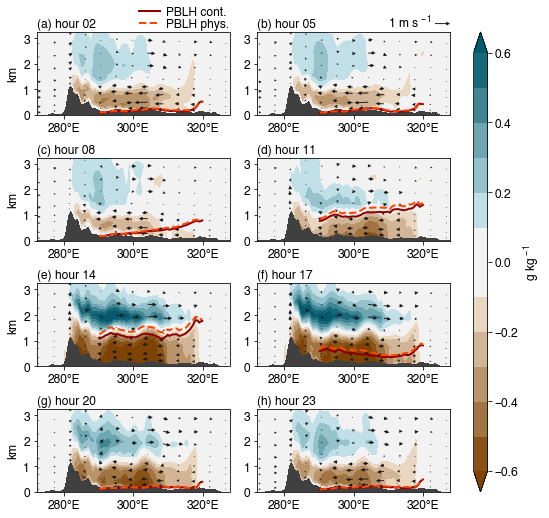

In [54]:
fontsize=12

fig = mp.figure(figsize=(6.5,7))

y_zero = numpy.zeros(xlong.shape[1])
levels = numpy.arange(-0.6,0.61,0.1)

xticks_deg_E=numpy.array((280,300,320))
xticks = -(360-xticks_deg_E)
xticks_format=[str(tick)+DEGREE_SIGN+'E' for tick in xticks_deg_E]

every_nth_lon=10
every_nth_z=1
z_indices=[1,3,5,6,7,8,9,10,11,12,13,14,15,16]
quiver_scale = .25 # 0.05 for 850-600, 0.1 for below 850
quiver_shaft_width = .25#.75
quiver_key_scale = 1
quiver_color = '0.1'
quiver_head_width = quiver_shaft_width*15
quiver_head_length = quiver_shaft_width*15

nrows=4;ncols=2
ax_list = []

for t in range(8):
    ax = fig.add_subplot(nrows,ncols,t+1)#, projection=cartopy.crs.PlateCarree())
    
    contour_plot = ax.contourf(xx+360.,\
                               geopot_400_lat_mean[0,:,:]/(g*1000.),\
                               qvapor_diffs_array[t]*1000.,\
                               levels=levels,\
                               cmap=seaborn.diverging_palette(35, 220, as_cmap=True, s=99, l=35, sep=25),\
                               extend='both')
    
    quiver_plot = ax.quiver(xx[z_indices,::every_nth_lon]+360.,\
              geopot_400_lat_mean[0,z_indices,::every_nth_lon]/(g*1000.),\
              ua_diffs_array[t][z_indices,::every_nth_lon],\
              wa_diffs_array[t][z_indices,::every_nth_lon]*100.,\
              units='xy', scale=quiver_scale, \
              color=quiver_color, zorder=3, \
              width=quiver_shaft_width, headwidth=quiver_head_width,\
              headlength=quiver_head_length)
    if t==1:
        quiver_plot_for_key = quiver_plot

    ax.plot(xx[0,:]+360.,pblh_400_array[t]/1000.,c='darkred', label='PBLH cont.', zorder=3, lw=2)
    ax.plot(xx[0,:]+360.,pblh_1000_array[t]/1000.,c='orangered',ls='--', label='PBLH phys.', zorder=3, lw=2)

    ax.tick_params(labelsize=fontsize)
    ax.set_ylim(0,3.25)
    ax.set_xlim(xlong.min()+67.+360.,xlong.max()+360.-7.)
    
    ax.set_yticks([0,1,2,3])
    ax.set_xticks([280,300,320])
    ax.set_xticklabels(xticks_format)
    if t in [0,2,4,6]:
        ax.set_ylabel('km', fontsize=fontsize)
    
    ax.text(s='('+string.ascii_lowercase[t]+') hour '+hour_strings_local[t], x=0, y=1.02,\
            transform=ax.transAxes,fontsize=fontsize,ha='left',va='bottom')
    
    ax.set_facecolor('0.25')
    ax_list.append(ax)

fig.tight_layout(h_pad=2)

top_pos = ax_list[1].get_position()
bottom_pos = ax_list[7].get_position()
cbar_axes = fig.add_axes([bottom_pos.x1+0.05, bottom_pos.y0, 0.03, top_pos.y1-bottom_pos.y0])
cbar = mp.colorbar(contour_plot, orientation='vertical', cax=cbar_axes)
cbar_axes.tick_params(labelsize=fontsize)
cbar.set_label('g kg$^{\,-1}$', fontsize=fontsize)

handles, labels = ax_list[0].get_legend_handles_labels()
legend = ax_list[0].legend(handles, labels, fontsize=fontsize, ncol=1, bbox_to_anchor=(1,1.02), \
                   edgecolor='None', facecolor='None', fancybox=False, bbox_transform=ax_list[0].transAxes, \
                   loc='lower right', labelspacing=0, \
                   borderaxespad=0, borderpad=0, handlelength=1.75, \
                   handletextpad=0.5)

quiver_key = ax_list[1].quiverkey(quiver_plot_for_key, \
                                  coordinates='axes', \
                                  X=1, Y=1.1, labelpos='E', \
                                  label='', \
                                  U=quiver_key_scale)
quiver_key_text = ax_list[1].text(s=str(quiver_key_scale)+' m s$^{\,-1}$',\
                                  x=0.9, y=1.02,\
                                  ha='right', va='bottom',\
                                  transform=ax_list[1].transAxes, \
                                  fontsize=fontsize)

fig.savefig('manuscript_figure3_qvapor_pblh_cross_sections.png', dpi=600, bbox_inches='tight')

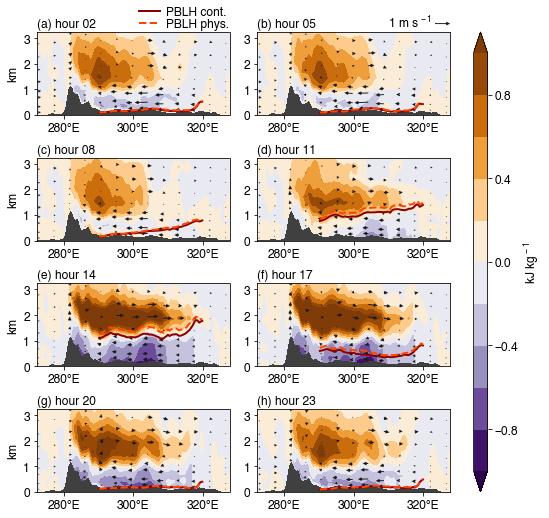

In [182]:
fontsize=12

fig = mp.figure(figsize=(6.5,7))

y_zero = numpy.zeros(xlong.shape[1])
levels = numpy.arange(-1,1.1,0.2)

xticks_deg_E=numpy.array((280,300,320))
xticks = -(360-xticks_deg_E)
xticks_format=[str(tick)+DEGREE_SIGN+'E' for tick in xticks_deg_E]

every_nth_lon=10
every_nth_z=1
z_indices=[1,3,5,6,7,8,9,10,11,12,13,14,15,16]
quiver_scale = .25 # 0.05 for 850-600, 0.1 for below 850
quiver_shaft_width = .25#.75
quiver_key_scale = 1
quiver_color = '0.1'
quiver_head_width = quiver_shaft_width*15
quiver_head_length = quiver_shaft_width*15

nrows=4;ncols=2
ax_list = []

for t in range(8):
    ax = fig.add_subplot(nrows,ncols,t+1)#, projection=cartopy.crs.PlateCarree())
    
    contour_plot = ax.contourf(xx+360.,\
                               geopot_400_lat_mean[0,:,:]/(g*1000.),\
                               mse_diffs_array[t]/1000.,\
                               levels=levels,\
                               cmap='PuOr_r',\
                               extend='both')
    
    quiver_plot = ax.quiver(xx[z_indices,::every_nth_lon]+360.,\
              geopot_400_lat_mean[0,z_indices,::every_nth_lon]/(g*1000.),\
              ua_diffs_array[t][z_indices,::every_nth_lon],\
              wa_diffs_array[t][z_indices,::every_nth_lon]*100.,\
              units='xy', scale=quiver_scale, \
              color=quiver_color, zorder=3, \
              width=quiver_shaft_width, headwidth=quiver_head_width,\
              headlength=quiver_head_length)
    if t==1:
        quiver_plot_for_key = quiver_plot

    ax.plot(xx[0,:]+360.,pblh_400_array[t]/1000.,c='darkred', label='PBLH cont.', zorder=3, lw=2)
    ax.plot(xx[0,:]+360.,pblh_1000_array[t]/1000.,c='orangered',ls='--', label='PBLH phys.', zorder=3, lw=2)

    ax.tick_params(labelsize=fontsize)
    ax.set_ylim(0,3.25)
    ax.set_xlim(xlong.min()+67.+360.,xlong.max()+360.-7.)
    
    ax.set_yticks([0,1,2,3])
    ax.set_xticks([280,300,320])
    ax.set_xticklabels(xticks_format)
    if t in [0,2,4,6]:
        ax.set_ylabel('km', fontsize=fontsize)
    
    ax.text(s='('+string.ascii_lowercase[t]+') hour '+hour_strings_local[t], x=0, y=1.02,\
            transform=ax.transAxes,fontsize=fontsize,ha='left',va='bottom')
    
    ax.set_facecolor('0.25')
    ax_list.append(ax)

fig.tight_layout(h_pad=2)

top_pos = ax_list[1].get_position()
bottom_pos = ax_list[7].get_position()
cbar_axes = fig.add_axes([bottom_pos.x1+0.05, bottom_pos.y0, 0.03, top_pos.y1-bottom_pos.y0])
cbar = mp.colorbar(contour_plot, orientation='vertical', cax=cbar_axes)
cbar_axes.tick_params(labelsize=fontsize)
cbar.set_label('kJ kg$^{\,-1}$', fontsize=fontsize)

handles, labels = ax_list[0].get_legend_handles_labels()
legend = ax_list[0].legend(handles, labels, fontsize=fontsize, ncol=1, bbox_to_anchor=(1,1.02), \
                   edgecolor='None', facecolor='None', fancybox=False, bbox_transform=ax_list[0].transAxes, \
                   loc='lower right', labelspacing=0, \
                   borderaxespad=0, borderpad=0, handlelength=1.75, \
                   handletextpad=0.5)

quiver_key = ax_list[1].quiverkey(quiver_plot_for_key, \
                                  coordinates='axes', \
                                  X=1, Y=1.1, labelpos='E', \
                                  label='', \
                                  U=quiver_key_scale)
quiver_key_text = ax_list[1].text(s=str(quiver_key_scale)+' m s$^{\,-1}$',\
                                  x=0.9, y=1.02,\
                                  ha='right', va='bottom',\
                                  transform=ax_list[1].transAxes, \
                                  fontsize=fontsize)

fig.savefig('manuscript_figureXX_mse_pblh_cross_sections.png', dpi=600, bbox_inches='tight')

## late morning/early afternoon version

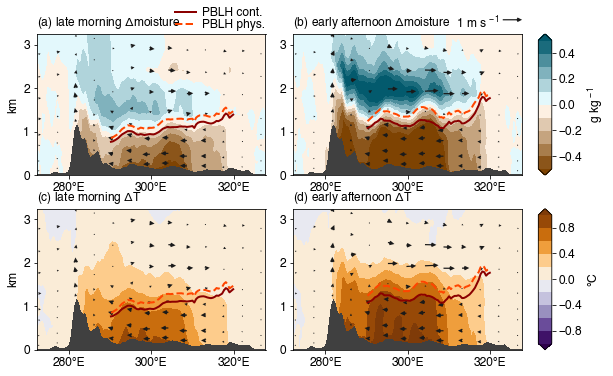

In [136]:
gs = matplotlib.gridspec.GridSpec(2,2,width_ratios=[1,1],height_ratios=[1,1])

fontsize=12

fig = mp.figure(figsize=(7.5,5))

y_zero = numpy.zeros(xlong.shape[1])
levels = numpy.arange(-0.5,0.51,0.1)#75,.751,0.125)

xticks_deg_E=numpy.array((280,300,320))
xticks = -(360-xticks_deg_E)
xticks_format=[str(tick)+DEGREE_SIGN+'E' for tick in xticks_deg_E]

every_nth_lon=10
every_nth_z=1
z_indices=[1,3,5,6,7,8,9,10,11,12,13,14,15,16]
quiver_scale = .25 # 0.05 for 850-600, 0.1 for below 850
quiver_shaft_width = .25#.75
quiver_key_scale = 1
quiver_color = '0.1'
quiver_head_width = quiver_shaft_width*15
quiver_head_length = quiver_shaft_width*15

ax_list = []

cmap_choice = seaborn.diverging_palette(35, 220, as_cmap=True, s=99, l=35, sep=20)
##################################################

t=3
ax = fig.add_subplot(gs[0])#, projection=cartopy.crs.PlateCarree())
contour_plot1 = ax.contourf(xx+360.,\
                           geopot_400_lat_mean[0,:,:]/(g*1000.),\
                           qvapor_diffs_array[t]*1000.,\
                           levels=levels,\
                           cmap=cmap_choice,\
                           extend='both')
quiver_plot = ax.quiver(xx[z_indices,::every_nth_lon]+360.,\
          geopot_400_lat_mean[0,z_indices,::every_nth_lon]/(g*1000.),\
          ua_diffs_array[t][z_indices,::every_nth_lon],\
          wa_diffs_array[t][z_indices,::every_nth_lon]*100.,\
          units='xy', scale=quiver_scale, \
          color=quiver_color, zorder=3, \
          width=quiver_shaft_width, headwidth=quiver_head_width,\
          headlength=quiver_head_length)
if t==4:
    quiver_plot_for_key = quiver_plot
ax.plot(xx[0,:]+360.,pblh_400_array[t]/1000.,c='darkred', label='PBLH cont.', zorder=3, lw=2)
ax.plot(xx[0,:]+360.,pblh_1000_array[t]/1000.,c='orangered',ls='--', label='PBLH phys.', zorder=3, lw=2)
ax.tick_params(labelsize=fontsize)
ax.set_ylim(0,3.25)
ax.set_xlim(xlong.min()+67.+360.,xlong.max()+360.-7.)
ax.set_yticks([0,1,2,3])
ax.set_xticks([280,300,320])
ax.set_xticklabels(xticks_format)
ax.set_ylabel('km', fontsize=fontsize)
ax.text(s='(a) late morning $\Delta$moisture', x=0, y=1.02,\
        transform=ax.transAxes,fontsize=fontsize,ha='left',va='bottom')
ax.set_facecolor('0.25')
ax_list.append(ax)

##################################################

t=4
ax = fig.add_subplot(gs[1])#, projection=cartopy.crs.PlateCarree())
contour_plot2 = ax.contourf(xx+360.,\
                           geopot_400_lat_mean[0,:,:]/(g*1000.),\
                           qvapor_diffs_array[t]*1000.,\
                           levels=levels,\
                           cmap=cmap_choice,\
                           extend='both')
quiver_plot = ax.quiver(xx[z_indices,::every_nth_lon]+360.,\
          geopot_400_lat_mean[0,z_indices,::every_nth_lon]/(g*1000.),\
          ua_diffs_array[t][z_indices,::every_nth_lon],\
          wa_diffs_array[t][z_indices,::every_nth_lon]*100.,\
          units='xy', scale=quiver_scale, \
          color=quiver_color, zorder=3, \
          width=quiver_shaft_width, headwidth=quiver_head_width,\
          headlength=quiver_head_length)
if t==4:
    quiver_plot_for_key = quiver_plot
ax.plot(xx[0,:]+360.,pblh_400_array[t]/1000.,c='darkred', label='PBLH cont.', zorder=3, lw=2)
ax.plot(xx[0,:]+360.,pblh_1000_array[t]/1000.,c='orangered',ls='--', label='PBLH phys.', zorder=3, lw=2)
ax.tick_params(labelsize=fontsize)
ax.set_ylim(0,3.25)
ax.set_xlim(xlong.min()+67.+360.,xlong.max()+360.-7.)
ax.set_yticks([0,1,2,3])
ax.set_xticks([280,300,320])
ax.set_xticklabels(xticks_format)
ax.text(s='(b) early afternoon $\Delta$moisture', x=0, y=1.02,\
        transform=ax.transAxes,fontsize=fontsize,ha='left',va='bottom')
ax.set_facecolor('0.25')
ax_list.append(ax)

##################################################

##################################################
#z_indices=[1,5,7,9,11,13,15,17,19,21,23]
cmap_choice = 'PuOr_r'
levels=numpy.arange(-1,1.1,0.2)

t=3
ax = fig.add_subplot(gs[2])
contour_plot3 = ax.contourf(xx+360.,\
                           geopot_400_lat_mean[0,:,:]/(g*1000.),\
                           tk_diffs_array[t],\
                           levels=levels,\
                           cmap=cmap_choice,\
                           extend='both')
quiver_plot = ax.quiver(xx[z_indices,::every_nth_lon]+360.,\
          geopot_400_lat_mean[0,z_indices,::every_nth_lon]/(g*1000.),\
          ua_diffs_array[t][z_indices,::every_nth_lon],\
          wa_diffs_array[t][z_indices,::every_nth_lon]*100.,\
          units='xy', scale=quiver_scale, \
          color=quiver_color, zorder=3, \
          width=quiver_shaft_width, headwidth=quiver_head_width,\
          headlength=quiver_head_length)
ax.plot(xx[0,:]+360.,pblh_400_array[t]/1000.,c='darkred', label='PBLH cont.', zorder=3, lw=2)
ax.plot(xx[0,:]+360.,pblh_1000_array[t]/1000.,c='orangered',ls='--', label='PBLH phys.', zorder=3, lw=2)
ax.tick_params(labelsize=fontsize)
ax.set_ylim(0,3.25)
ax.set_yticks([0,1,2,3])
ax.set_xlim(xlong.min()+67.+360.,xlong.max()+360.-7.)
ax.set_ylabel('km', fontsize=fontsize)
ax.set_xticks([280,300,320])
ax.set_xticklabels(xticks_format)
ax.text(s='(c) late morning $\Delta$T', x=0, y=1.02,\
        transform=ax.transAxes,fontsize=fontsize,ha='left',va='bottom')
ax.set_facecolor('0.25')
ax_list.append(ax)

##################################################

t=4
ax = fig.add_subplot(gs[3])#, projection=cartopy.crs.PlateCarree())
contour_plot4 = ax.contourf(xx+360.,\
                           geopot_400_lat_mean[0,:,:]/(g*1000.),\
                           tk_diffs_array[t],\
                           levels=levels,\
                           cmap=cmap_choice,\
                           extend='both')
quiver_plot = ax.quiver(xx[z_indices,::every_nth_lon]+360.,\
          geopot_400_lat_mean[0,z_indices,::every_nth_lon]/(g*1000.),\
          ua_diffs_array[t][z_indices,::every_nth_lon],\
          wa_diffs_array[t][z_indices,::every_nth_lon]*100.,\
          units='xy', scale=quiver_scale, \
          color=quiver_color, zorder=3, \
          width=quiver_shaft_width, headwidth=quiver_head_width,\
          headlength=quiver_head_length)
ax.plot(xx[0,:]+360.,pblh_400_array[t]/1000.,c='darkred', label='PBLH cont.', zorder=3, lw=2)
ax.plot(xx[0,:]+360.,pblh_1000_array[t]/1000.,c='orangered',ls='--', label='PBLH phys.', zorder=3, lw=2)
ax.tick_params(labelsize=fontsize)
ax.set_ylim(0,3.25)
ax.set_xlim(xlong.min()+67.+360.,xlong.max()+360.-7.)
ax.set_yticks([0,1,2,3])
ax.set_xticks([280,300,320])
ax.set_xticklabels(xticks_format)
ax.text(s='(d) early afternoon $\Delta$T', x=0, y=1.02,\
        transform=ax.transAxes,fontsize=fontsize,ha='left',va='bottom')
ax.set_facecolor('0.25')
ax_list.append(ax)

##################################################


fig.tight_layout()#w_pad=0, h_pad=2)

top_pos = ax_list[1].get_position()
bottom_pos = ax_list[-1].get_position()
cbar_axes1 = fig.add_axes([top_pos.x1+0.03, top_pos.y0, 0.025, top_pos.height])
cbar = mp.colorbar(contour_plot1, orientation='vertical', cax=cbar_axes1)
cbar_axes1.tick_params(labelsize=fontsize)
cbar.set_label('g kg$^{\,-1}$', fontsize=fontsize)


top_pos = ax_list[1].get_position()
bottom_pos = ax_list[-1].get_position()
cbar_axes2 = fig.add_axes([bottom_pos.x1+0.03, bottom_pos.y0, 0.025, bottom_pos.height])
cbar = mp.colorbar(contour_plot4, orientation='vertical', cax=cbar_axes2)
cbar_axes2.tick_params(labelsize=fontsize)
cbar.set_label('$\degree$C', fontsize=fontsize)

handles, labels = ax_list[0].get_legend_handles_labels()
legend = ax_list[0].legend(handles, labels, fontsize=fontsize, ncol=1, bbox_to_anchor=(1,1.02), \
                   edgecolor='None', facecolor='None', fancybox=False, bbox_transform=ax_list[0].transAxes, \
                   loc='lower right', labelspacing=0, \
                   borderaxespad=0, borderpad=0, handlelength=1.75, \
                   handletextpad=0.5)

quiver_key = ax_list[1].quiverkey(quiver_plot_for_key, \
                                  coordinates='axes', \
                                  X=1, Y=1.1, labelpos='E', \
                                  label='', \
                                  U=quiver_key_scale)
quiver_key_text = ax_list[1].text(s=str(quiver_key_scale)+' m s$^{\,-1}$',\
                                  x=0.9, y=1.02,\
                                  ha='right', va='bottom',\
                                  transform=ax_list[1].transAxes, \
                                  fontsize=fontsize)

#ax_list[0].yaxis.set_label_coords(-0.1,0.5)
#ax_list[2].yaxis.set_label_coords(-0.1,0.5)

#seaborn.diverging_palette(35, 220, as_cmap=True, s=99, l=35, sep=25)
#fig.savefig('manuscript_figure3_qvapor_pblh_cross_sections.png', dpi=600, bbox_inches='tight')

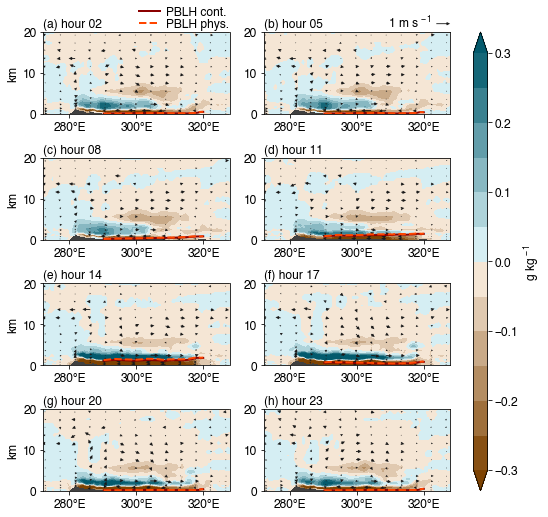

In [112]:
fontsize=12

fig = mp.figure(figsize=(6.5,7))

y_zero = numpy.zeros(xlong.shape[1])
levels = numpy.arange(-0.3,0.31,0.05)

xticks_deg_E=numpy.array((280,300,320))
xticks = -(360-xticks_deg_E)
xticks_format=[str(tick)+DEGREE_SIGN+'E' for tick in xticks_deg_E]

every_nth_lon=10
every_nth_z=1
z_indices=[1,5]+[i for i in range(7,29,2)]
quiver_scale = .25 # 0.05 for 850-600, 0.1 for below 850
quiver_shaft_width = .25#.75
quiver_key_scale = 1
quiver_color = '0.1'
quiver_head_width = quiver_shaft_width*15
quiver_head_length = quiver_shaft_width*15

nrows=4;ncols=2
ax_list = []

for t in range(8):
    ax = fig.add_subplot(nrows,ncols,t+1)#, projection=cartopy.crs.PlateCarree())
    
    contour_plot = ax.contourf(xx+360.,\
                               geopot_400_lat_mean[0,:,:]/(g*1000.),\
                               qvapor_diffs_array[t]*1000.,\
                               levels=levels,\
                               cmap=seaborn.diverging_palette(35, 220, as_cmap=True, s=99, l=35, sep=1),\
                               extend='both')
    
    quiver_plot = ax.quiver(xx[z_indices,::every_nth_lon]+360.,\
              geopot_400_lat_mean[0,z_indices,::every_nth_lon]/(g*1000.),\
              ua_diffs_array[t][z_indices,::every_nth_lon],\
              wa_diffs_array[t][z_indices,::every_nth_lon]*100.,\
              units='xy', scale=quiver_scale, \
              color=quiver_color, zorder=3, \
              width=quiver_shaft_width, headwidth=quiver_head_width,\
              headlength=quiver_head_length)
    if t==1:
        quiver_plot_for_key = quiver_plot

    ax.plot(xx[0,:]+360.,pblh_400_array[t]/1000.,c='darkred', label='PBLH cont.', zorder=3, lw=2)
    ax.plot(xx[0,:]+360.,pblh_1000_array[t]/1000.,c='orangered',ls='--', label='PBLH phys.', zorder=3, lw=2)

    ax.tick_params(labelsize=fontsize)
    ax.set_ylim(0,20)
    ax.set_xlim(xlong.min()+67.+360.,xlong.max()+360.-7.)
    
    #ax.set_yticks([0,1,2,3])
    ax.set_xticks([280,300,320])
    ax.set_xticklabels(xticks_format)
    if t in [0,2,4,6]:
        ax.set_ylabel('km', fontsize=fontsize)
    
    ax.text(s='('+string.ascii_lowercase[t]+') hour '+hour_strings_local[t], x=0, y=1.02,\
            transform=ax.transAxes,fontsize=fontsize,ha='left',va='bottom')
    
    ax.set_facecolor('0.25')
    ax_list.append(ax)

fig.tight_layout(h_pad=2)

top_pos = ax_list[1].get_position()
bottom_pos = ax_list[7].get_position()
cbar_axes = fig.add_axes([bottom_pos.x1+0.05, bottom_pos.y0, 0.03, top_pos.y1-bottom_pos.y0])
cbar = mp.colorbar(contour_plot, orientation='vertical', cax=cbar_axes)
cbar_axes.tick_params(labelsize=fontsize)
cbar.set_label('g kg$^{\,-1}$', fontsize=fontsize)

handles, labels = ax_list[0].get_legend_handles_labels()
legend = ax_list[0].legend(handles, labels, fontsize=fontsize, ncol=1, bbox_to_anchor=(1,1.02), \
                   edgecolor='None', facecolor='None', fancybox=False, bbox_transform=ax_list[0].transAxes, \
                   loc='lower right', labelspacing=0, \
                   borderaxespad=0, borderpad=0, handlelength=1.75, \
                   handletextpad=0.5)

quiver_key = ax_list[1].quiverkey(quiver_plot_for_key, \
                                  coordinates='axes', \
                                  X=1, Y=1.1, labelpos='E', \
                                  label='', \
                                  U=quiver_key_scale)
quiver_key_text = ax_list[1].text(s=str(quiver_key_scale)+' m s$^{\,-1}$',\
                                  x=0.9, y=1.02,\
                                  ha='right', va='bottom',\
                                  transform=ax_list[1].transAxes, \
                                  fontsize=fontsize)

fig.savefig('manuscript_figure3_qvapor_pblh_cross_sections_upto20km.png', dpi=600, bbox_inches='tight')

# qrain differences

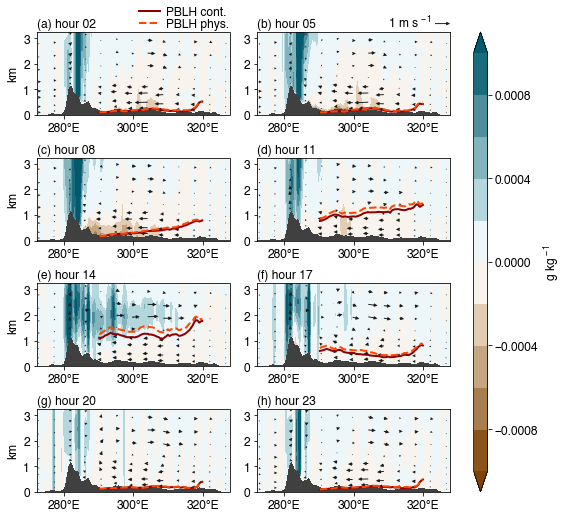

In [147]:
fontsize=12

fig = mp.figure(figsize=(6.5,7))

y_zero = numpy.zeros(xlong.shape[1])
levels = numpy.arange(-0.001,0.0011,0.0002)

xticks_deg_E=numpy.array((280,300,320))
xticks = -(360-xticks_deg_E)
xticks_format=[str(tick)+DEGREE_SIGN+'E' for tick in xticks_deg_E]

every_nth_lon=10
every_nth_z=1
z_indices=[1,3,5,6,7,8,9,10,11,12,13,14,15,16]
quiver_scale = .25 # 0.05 for 850-600, 0.1 for below 850
quiver_shaft_width = .25#.75
quiver_key_scale = 1
quiver_color = '0.1'
quiver_head_width = quiver_shaft_width*15
quiver_head_length = quiver_shaft_width*15

nrows=4;ncols=2
ax_list = []

for t in range(8):
    ax = fig.add_subplot(nrows,ncols,t+1)#, projection=cartopy.crs.PlateCarree())
    
    contour_plot = ax.contourf(xx+360.,\
                               geopot_400_lat_mean[0,:,:]/(g*1000.),\
                               qrain_diffs_array[t]*1000.,\
                               levels=levels,\
                               cmap=seaborn.diverging_palette(35, 220, as_cmap=True, s=99, l=35, sep=25),\
                               extend='both')
    
    quiver_plot = ax.quiver(xx[z_indices,::every_nth_lon]+360.,\
              geopot_400_lat_mean[0,z_indices,::every_nth_lon]/(g*1000.),\
              ua_diffs_array[t][z_indices,::every_nth_lon],\
              wa_diffs_array[t][z_indices,::every_nth_lon]*100.,\
              units='xy', scale=quiver_scale, \
              color=quiver_color, zorder=3, \
              width=quiver_shaft_width, headwidth=quiver_head_width,\
              headlength=quiver_head_length)
    if t==1:
        quiver_plot_for_key = quiver_plot

    ax.plot(xx[0,:]+360.,pblh_400_array[t]/1000.,c='darkred', label='PBLH cont.', zorder=3, lw=2)
    ax.plot(xx[0,:]+360.,pblh_1000_array[t]/1000.,c='orangered',ls='--', label='PBLH phys.', zorder=3, lw=2)

    ax.tick_params(labelsize=fontsize)
    ax.set_ylim(0,3.25)
    ax.set_xlim(xlong.min()+67.+360.,xlong.max()+360.-7.)
    
    ax.set_yticks([0,1,2,3])
    ax.set_xticks([280,300,320])
    ax.set_xticklabels(xticks_format)
    if t in [0,2,4,6]:
        ax.set_ylabel('km', fontsize=fontsize)
    
    ax.text(s='('+string.ascii_lowercase[t]+') hour '+hour_strings_local[t], x=0, y=1.02,\
            transform=ax.transAxes,fontsize=fontsize,ha='left',va='bottom')
    
    ax.set_facecolor('0.25')
    ax_list.append(ax)

fig.tight_layout(h_pad=2)

top_pos = ax_list[1].get_position()
bottom_pos = ax_list[7].get_position()
cbar_axes = fig.add_axes([bottom_pos.x1+0.05, bottom_pos.y0, 0.03, top_pos.y1-bottom_pos.y0])
cbar = mp.colorbar(contour_plot, orientation='vertical', cax=cbar_axes)
cbar_axes.tick_params(labelsize=fontsize)
cbar.set_label('g kg$^{\,-1}$', fontsize=fontsize)

handles, labels = ax_list[0].get_legend_handles_labels()
legend = ax_list[0].legend(handles, labels, fontsize=fontsize, ncol=1, bbox_to_anchor=(1,1.02), \
                   edgecolor='None', facecolor='None', fancybox=False, bbox_transform=ax_list[0].transAxes, \
                   loc='lower right', labelspacing=0, \
                   borderaxespad=0, borderpad=0, handlelength=1.75, \
                   handletextpad=0.5)

quiver_key = ax_list[1].quiverkey(quiver_plot_for_key, \
                                  coordinates='axes', \
                                  X=1, Y=1.1, labelpos='E', \
                                  label='', \
                                  U=quiver_key_scale)
quiver_key_text = ax_list[1].text(s=str(quiver_key_scale)+' m s$^{\,-1}$',\
                                  x=0.9, y=1.02,\
                                  ha='right', va='bottom',\
                                  transform=ax_list[1].transAxes, \
                                  fontsize=fontsize)

fig.savefig('manuscript_figureXX_qrain_pblh_cross_sections.png', dpi=600, bbox_inches='tight')

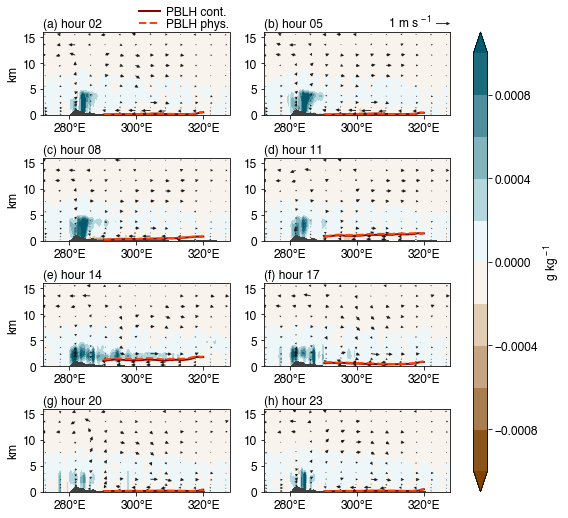

In [150]:
fontsize=12

fig = mp.figure(figsize=(6.5,7))

y_zero = numpy.zeros(xlong.shape[1])
levels = numpy.arange(-0.001,0.0011,0.0002)

xticks_deg_E=numpy.array((280,300,320))
xticks = -(360-xticks_deg_E)
xticks_format=[str(tick)+DEGREE_SIGN+'E' for tick in xticks_deg_E]

every_nth_lon=10
every_nth_z=1
z_indices=[1,5]+[i for i in range(7,29,2)]
quiver_scale = .25 # 0.05 for 850-600, 0.1 for below 850
quiver_shaft_width = .25#.75
quiver_key_scale = 1
quiver_color = '0.1'
quiver_head_width = quiver_shaft_width*15
quiver_head_length = quiver_shaft_width*15

nrows=4;ncols=2
ax_list = []

for t in range(8):
    ax = fig.add_subplot(nrows,ncols,t+1)#, projection=cartopy.crs.PlateCarree())
    
    contour_plot = ax.contourf(xx+360.,\
                               geopot_400_lat_mean[0,:,:]/(g*1000.),\
                               qrain_diffs_array[t]*1000.,\
                               levels=levels,\
                               cmap=seaborn.diverging_palette(35, 220, as_cmap=True, s=99, l=35, sep=25),\
                               extend='both')
    
    quiver_plot = ax.quiver(xx[z_indices,::every_nth_lon]+360.,\
              geopot_400_lat_mean[0,z_indices,::every_nth_lon]/(g*1000.),\
              ua_diffs_array[t][z_indices,::every_nth_lon],\
              wa_diffs_array[t][z_indices,::every_nth_lon]*100.,\
              units='xy', scale=quiver_scale, \
              color=quiver_color, zorder=3, \
              width=quiver_shaft_width, headwidth=quiver_head_width,\
              headlength=quiver_head_length)
    if t==1:
        quiver_plot_for_key = quiver_plot

    ax.plot(xx[0,:]+360.,pblh_400_array[t]/1000.,c='darkred', label='PBLH cont.', zorder=3, lw=2)
    ax.plot(xx[0,:]+360.,pblh_1000_array[t]/1000.,c='orangered',ls='--', label='PBLH phys.', zorder=3, lw=2)

    ax.tick_params(labelsize=fontsize)
    ax.set_ylim(0,16)
    ax.set_xlim(xlong.min()+67.+360.,xlong.max()+360.-7.)
    
    ax.set_yticks([0,5,10,15])
    ax.set_xticks([280,300,320])
    ax.set_xticklabels(xticks_format)
    if t in [0,2,4,6]:
        ax.set_ylabel('km', fontsize=fontsize)
    
    ax.text(s='('+string.ascii_lowercase[t]+') hour '+hour_strings_local[t], x=0, y=1.02,\
            transform=ax.transAxes,fontsize=fontsize,ha='left',va='bottom')
    
    ax.set_facecolor('0.25')
    ax_list.append(ax)

fig.tight_layout(h_pad=2)

top_pos = ax_list[1].get_position()
bottom_pos = ax_list[7].get_position()
cbar_axes = fig.add_axes([bottom_pos.x1+0.05, bottom_pos.y0, 0.03, top_pos.y1-bottom_pos.y0])
cbar = mp.colorbar(contour_plot, orientation='vertical', cax=cbar_axes)
cbar_axes.tick_params(labelsize=fontsize)
cbar.set_label('g kg$^{\,-1}$', fontsize=fontsize)

handles, labels = ax_list[0].get_legend_handles_labels()
legend = ax_list[0].legend(handles, labels, fontsize=fontsize, ncol=1, bbox_to_anchor=(1,1.02), \
                   edgecolor='None', facecolor='None', fancybox=False, bbox_transform=ax_list[0].transAxes, \
                   loc='lower right', labelspacing=0, \
                   borderaxespad=0, borderpad=0, handlelength=1.75, \
                   handletextpad=0.5)

quiver_key = ax_list[1].quiverkey(quiver_plot_for_key, \
                                  coordinates='axes', \
                                  X=1, Y=1.1, labelpos='E', \
                                  label='', \
                                  U=quiver_key_scale)
quiver_key_text = ax_list[1].text(s=str(quiver_key_scale)+' m s$^{\,-1}$',\
                                  x=0.9, y=1.02,\
                                  ha='right', va='bottom',\
                                  transform=ax_list[1].transAxes, \
                                  fontsize=fontsize)

fig.savefig('manuscript_figureXX_qrain_pblh_cross_sections_upto16km.png', dpi=600, bbox_inches='tight')

# qcloud differences

# cldfra differences

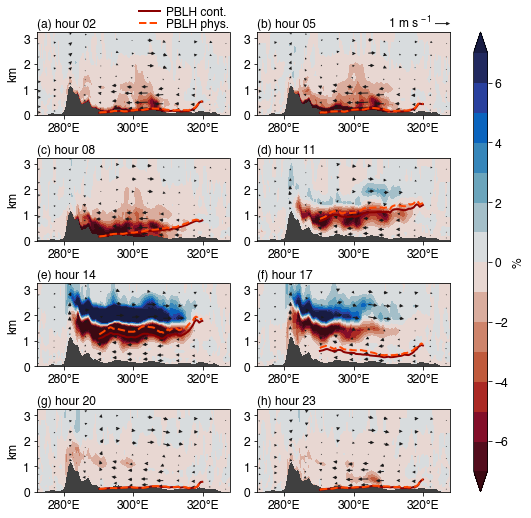

In [58]:
fontsize=12

fig = mp.figure(figsize=(6.5,7))

y_zero = numpy.zeros(xlong.shape[1])
levels = numpy.arange(-7,7.1,1)

xticks_deg_E=numpy.array((280,300,320))
xticks = -(360-xticks_deg_E)
xticks_format=[str(tick)+DEGREE_SIGN+'E' for tick in xticks_deg_E]

every_nth_lon=10
every_nth_z=1
z_indices=[1,3,5,6,7,8,9,10,11,12,13,14,15,16]
quiver_scale = .25 # 0.05 for 850-600, 0.1 for below 850
quiver_shaft_width = .25#.75
quiver_key_scale = 1
quiver_color = '0.1'
quiver_head_width = quiver_shaft_width*15
quiver_head_length = quiver_shaft_width*15

nrows=4;ncols=2
ax_list = []

for t in range(8):
    ax = fig.add_subplot(nrows,ncols,t+1)#, projection=cartopy.crs.PlateCarree())
    
    contour_plot = ax.contourf(xx+360.,\
                               geopot_400_lat_mean[0,:,:]/(g*1000.),\
                               cldfra_diffs_array[t]*100.,\
                               levels=levels,\
                               cmap=cmocean.cm.balance_r,\
                               extend='both')
    
    quiver_plot = ax.quiver(xx[z_indices,::every_nth_lon]+360.,\
              geopot_400_lat_mean[0,z_indices,::every_nth_lon]/(g*1000.),\
              ua_diffs_array[t][z_indices,::every_nth_lon],\
              wa_diffs_array[t][z_indices,::every_nth_lon]*100.,\
              units='xy', scale=quiver_scale, \
              color=quiver_color, zorder=3, \
              width=quiver_shaft_width, headwidth=quiver_head_width,\
              headlength=quiver_head_length)
    if t==1:
        quiver_plot_for_key = quiver_plot

    ax.plot(xx[0,:]+360.,pblh_400_array[t]/1000.,c='darkred', label='PBLH cont.', zorder=3, lw=2)
    ax.plot(xx[0,:]+360.,pblh_1000_array[t]/1000.,c='orangered',ls='--', label='PBLH phys.', zorder=3, lw=2)

    ax.tick_params(labelsize=fontsize)
    ax.set_ylim(0,3.25)
    ax.set_xlim(xlong.min()+67.+360.,xlong.max()+360.-7.)
    
    ax.set_yticks([0,1,2,3])
    ax.set_xticks([280,300,320])
    ax.set_xticklabels(xticks_format)
    if t in [0,2,4,6]:
        ax.set_ylabel('km', fontsize=fontsize)
    
    ax.text(s='('+string.ascii_lowercase[t]+') hour '+hour_strings_local[t], x=0, y=1.02,\
            transform=ax.transAxes,fontsize=fontsize,ha='left',va='bottom')
    
    ax.set_facecolor('0.25')
    ax_list.append(ax)

fig.tight_layout(h_pad=2)

top_pos = ax_list[1].get_position()
bottom_pos = ax_list[7].get_position()
cbar_axes = fig.add_axes([bottom_pos.x1+0.05, bottom_pos.y0, 0.03, top_pos.y1-bottom_pos.y0])
cbar = mp.colorbar(contour_plot, orientation='vertical', cax=cbar_axes)
cbar_axes.tick_params(labelsize=fontsize)
cbar.set_label('%', fontsize=fontsize)

handles, labels = ax_list[0].get_legend_handles_labels()
legend = ax_list[0].legend(handles, labels, fontsize=fontsize, ncol=1, bbox_to_anchor=(1,1.02), \
                   edgecolor='None', facecolor='None', fancybox=False, bbox_transform=ax_list[0].transAxes, \
                   loc='lower right', labelspacing=0, \
                   borderaxespad=0, borderpad=0, handlelength=1.75, \
                   handletextpad=0.5)

quiver_key = ax_list[1].quiverkey(quiver_plot_for_key, \
                                  coordinates='axes', \
                                  X=1, Y=1.1, labelpos='E', \
                                  label='', \
                                  U=quiver_key_scale)
quiver_key_text = ax_list[1].text(s=str(quiver_key_scale)+' m s$^{\,-1}$',\
                                  x=0.9, y=1.02,\
                                  ha='right', va='bottom',\
                                  transform=ax_list[1].transAxes, \
                                  fontsize=fontsize)

fig.savefig('manuscript_figure4_cldfra_pblh_cross_sections.png', dpi=600, bbox_inches='tight')

## cldfra morning and afternoon

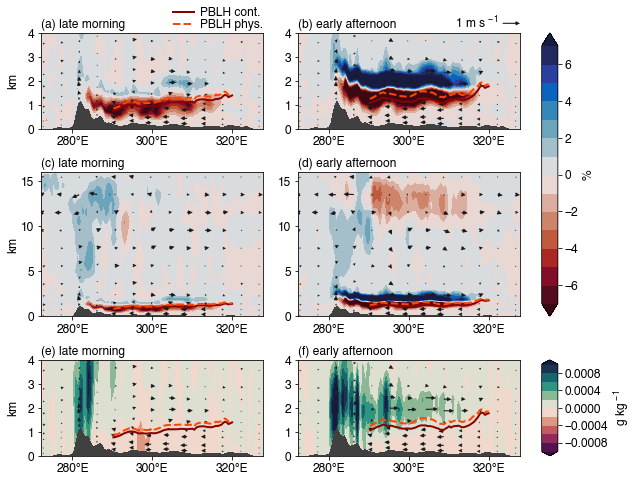

In [170]:
gs = matplotlib.gridspec.GridSpec(3,2,width_ratios=[1,1],height_ratios=[1,1.5,1])

fontsize=12

fig = mp.figure(figsize=(7.5,6.5))

y_zero = numpy.zeros(xlong.shape[1])
levels = numpy.arange(-7.,7.1,1)

xticks_deg_E=numpy.array((280,300,320))
xticks = -(360-xticks_deg_E)
xticks_format=[str(tick)+DEGREE_SIGN+'E' for tick in xticks_deg_E]

every_nth_lon=10
every_nth_z=1
z_indices=[1,3,5,6,7,8,9,10,11,12,13,14,15,16]
quiver_scale = .25 # 0.05 for 850-600, 0.1 for below 850
quiver_shaft_width = .25#.75
quiver_key_scale = 1
quiver_color = '0.1'
quiver_head_width = quiver_shaft_width*15
quiver_head_length = quiver_shaft_width*15

ax_list = []

cmap_choice = cmocean.cm.balance_r
##################################################

t=3
ax = fig.add_subplot(gs[0])#, projection=cartopy.crs.PlateCarree())
contour_plot1 = ax.contourf(xx+360.,\
                           geopot_400_lat_mean[0,:,:]/(g*1000.),\
                           cldfra_diffs_array[t]*100.,\
                           levels=levels,\
                           cmap=cmap_choice,\
                           extend='both')
quiver_plot = ax.quiver(xx[z_indices,::every_nth_lon]+360.,\
          geopot_400_lat_mean[0,z_indices,::every_nth_lon]/(g*1000.),\
          ua_diffs_array[t][z_indices,::every_nth_lon],\
          wa_diffs_array[t][z_indices,::every_nth_lon]*100.,\
          units='xy', scale=quiver_scale, \
          color=quiver_color, zorder=3, \
          width=quiver_shaft_width, headwidth=quiver_head_width,\
          headlength=quiver_head_length)
if t==4:
    quiver_plot_for_key = quiver_plot
ax.plot(xx[0,:]+360.,pblh_400_array[t]/1000.,c='darkred', label='PBLH cont.', zorder=3, lw=2)
ax.plot(xx[0,:]+360.,pblh_1000_array[t]/1000.,c='orangered',ls='--', label='PBLH phys.', zorder=3, lw=2)
ax.tick_params(labelsize=fontsize)
ax.set_ylim(0,4)
ax.set_xlim(xlong.min()+67.+360.,xlong.max()+360.-7.)
ax.set_yticks([0,1,2,3,4])
ax.set_xticks([280,300,320])
ax.set_xticklabels(xticks_format)
ax.set_ylabel('km', fontsize=fontsize)
ax.text(s='(a) late morning', x=0, y=1.02,\
        transform=ax.transAxes,fontsize=fontsize,ha='left',va='bottom')
ax.set_facecolor('0.25')
ax_list.append(ax)

##################################################

t=4
ax = fig.add_subplot(gs[1])#, projection=cartopy.crs.PlateCarree())
contour_plot1 = ax.contourf(xx+360.,\
                           geopot_400_lat_mean[0,:,:]/(g*1000.),\
                           cldfra_diffs_array[t]*100.,\
                           levels=levels,\
                           cmap=cmap_choice,\
                           extend='both')
quiver_plot = ax.quiver(xx[z_indices,::every_nth_lon]+360.,\
          geopot_400_lat_mean[0,z_indices,::every_nth_lon]/(g*1000.),\
          ua_diffs_array[t][z_indices,::every_nth_lon],\
          wa_diffs_array[t][z_indices,::every_nth_lon]*100.,\
          units='xy', scale=quiver_scale, \
          color=quiver_color, zorder=3, \
          width=quiver_shaft_width, headwidth=quiver_head_width,\
          headlength=quiver_head_length)
if t==4:
    quiver_plot_for_key = quiver_plot
ax.plot(xx[0,:]+360.,pblh_400_array[t]/1000.,c='darkred', label='PBLH cont.', zorder=3, lw=2)
ax.plot(xx[0,:]+360.,pblh_1000_array[t]/1000.,c='orangered',ls='--', label='PBLH phys.', zorder=3, lw=2)
ax.tick_params(labelsize=fontsize)
ax.set_ylim(0,4)
ax.set_xlim(xlong.min()+67.+360.,xlong.max()+360.-7.)
ax.set_yticks([0,1,2,3,4])
ax.set_xticks([280,300,320])
ax.set_xticklabels(xticks_format)
ax.text(s='(b) early afternoon', x=0, y=1.02,\
        transform=ax.transAxes,fontsize=fontsize,ha='left',va='bottom')
ax.set_facecolor('0.25')
ax_list.append(ax)

##################################################


every_nth_lon=10
every_nth_z=1
z_indices=[1,3,5,6,7,8,9,10,11,12,13,14,15,16]
quiver_scale = .25 # 0.05 for 850-600, 0.1 for below 850
quiver_shaft_width = .25#.75
quiver_key_scale = 1
quiver_color = '0.1'
quiver_head_width = quiver_shaft_width*15
quiver_head_length = quiver_shaft_width*15

##################################################
z_indices=[1,5,7,9,11,13,15,17,19,21,23,25,27]

t=3
ax = fig.add_subplot(gs[2])
contour_plot1 = ax.contourf(xx+360.,\
                           geopot_400_lat_mean[0,:,:]/(g*1000.),\
                           cldfra_diffs_array[t]*100.,\
                           levels=levels,\
                           cmap=cmap_choice,\
                           extend='both')
quiver_plot = ax.quiver(xx[z_indices,::every_nth_lon]+360.,\
          geopot_400_lat_mean[0,z_indices,::every_nth_lon]/(g*1000.),\
          ua_diffs_array[t][z_indices,::every_nth_lon],\
          wa_diffs_array[t][z_indices,::every_nth_lon]*100.,\
          units='xy', scale=quiver_scale, \
          color=quiver_color, zorder=3, \
          width=quiver_shaft_width, headwidth=quiver_head_width,\
          headlength=quiver_head_length)
ax.plot(xx[0,:]+360.,pblh_400_array[t]/1000.,c='darkred', label='PBLH cont.', zorder=3, lw=2)
ax.plot(xx[0,:]+360.,pblh_1000_array[t]/1000.,c='orangered',ls='--', label='PBLH phys.', zorder=3, lw=2)
ax.tick_params(labelsize=fontsize)
ax.set_ylim(0,16)
ax.set_xlim(xlong.min()+67.+360.,xlong.max()+360.-7.)
ax.set_ylabel('km', fontsize=fontsize)
ax.set_xticks([280,300,320])
ax.set_xticklabels(xticks_format)
ax.text(s='(c) late morning', x=0, y=1.02,\
        transform=ax.transAxes,fontsize=fontsize,ha='left',va='bottom')
ax.set_facecolor('0.25')
ax_list.append(ax)

##################################################

t=4
ax = fig.add_subplot(gs[3])#, projection=cartopy.crs.PlateCarree())
contour_plot1 = ax.contourf(xx+360.,\
                           geopot_400_lat_mean[0,:,:]/(g*1000.),\
                           cldfra_diffs_array[t]*100.,\
                           levels=levels,\
                           cmap=cmap_choice,\
                           extend='both')
quiver_plot = ax.quiver(xx[z_indices,::every_nth_lon]+360.,\
          geopot_400_lat_mean[0,z_indices,::every_nth_lon]/(g*1000.),\
          ua_diffs_array[t][z_indices,::every_nth_lon],\
          wa_diffs_array[t][z_indices,::every_nth_lon]*100.,\
          units='xy', scale=quiver_scale, \
          color=quiver_color, zorder=3, \
          width=quiver_shaft_width, headwidth=quiver_head_width,\
          headlength=quiver_head_length)
ax.plot(xx[0,:]+360.,pblh_400_array[t]/1000.,c='darkred', label='PBLH cont.', zorder=3, lw=2)
ax.plot(xx[0,:]+360.,pblh_1000_array[t]/1000.,c='orangered',ls='--', label='PBLH phys.', zorder=3, lw=2)
ax.tick_params(labelsize=fontsize)
ax.set_ylim(0,16)
ax.set_xlim(xlong.min()+67.+360.,xlong.max()+360.-7.)
#ax.set_yticks([0,1,2,3])
ax.set_xticks([280,300,320])
ax.set_xticklabels(xticks_format)
ax.text(s='(d) early afternoon', x=0, y=1.02,\
        transform=ax.transAxes,fontsize=fontsize,ha='left',va='bottom')
ax.set_facecolor('0.25')
ax_list.append(ax)

##################################################

##################################################

levels = numpy.arange(-0.001,0.0011,0.0002)

every_nth_lon=10
every_nth_z=1
z_indices=[1,3,5,6,7,8,9,10,11,12,13,14,15,16]
quiver_scale = .25 # 0.05 for 850-600, 0.1 for below 850
quiver_shaft_width = .25#.75
quiver_key_scale = 1
quiver_color = '0.1'
quiver_head_width = quiver_shaft_width*15
quiver_head_length = quiver_shaft_width*15

cmap_choice = cmocean.cm.curl_r
##################################################

t=3
ax = fig.add_subplot(gs[4])#, projection=cartopy.crs.PlateCarree())
contour_plot2 = ax.contourf(xx+360.,\
                           geopot_400_lat_mean[0,:,:]/(g*1000.),\
                           qrain_diffs_array[t]*1000.,\
                           levels=levels,\
                           cmap=cmap_choice,\
                           extend='both')
quiver_plot = ax.quiver(xx[z_indices,::every_nth_lon]+360.,\
          geopot_400_lat_mean[0,z_indices,::every_nth_lon]/(g*1000.),\
          ua_diffs_array[t][z_indices,::every_nth_lon],\
          wa_diffs_array[t][z_indices,::every_nth_lon]*100.,\
          units='xy', scale=quiver_scale, \
          color=quiver_color, zorder=3, \
          width=quiver_shaft_width, headwidth=quiver_head_width,\
          headlength=quiver_head_length)
ax.plot(xx[0,:]+360.,pblh_400_array[t]/1000.,c='darkred', label='PBLH cont.', zorder=3, lw=2)
ax.plot(xx[0,:]+360.,pblh_1000_array[t]/1000.,c='orangered',ls='--', label='PBLH phys.', zorder=3, lw=2)
ax.tick_params(labelsize=fontsize)
ax.set_ylim(0,4)
ax.set_xlim(xlong.min()+67.+360.,xlong.max()+360.-7.)
ax.set_yticks([0,1,2,3,4])
ax.set_xticks([280,300,320])
ax.set_xticklabels(xticks_format)
ax.set_ylabel('km', fontsize=fontsize)
ax.text(s='(e) late morning', x=0, y=1.02,\
        transform=ax.transAxes,fontsize=fontsize,ha='left',va='bottom')
ax.set_facecolor('0.25')
ax_list.append(ax)

##################################################

t=4
ax = fig.add_subplot(gs[5])#, projection=cartopy.crs.PlateCarree())
contour_plot2 = ax.contourf(xx+360.,\
                           geopot_400_lat_mean[0,:,:]/(g*1000.),\
                           qrain_diffs_array[t]*1000.,\
                           levels=levels,\
                           cmap=cmap_choice,\
                           extend='both')
quiver_plot = ax.quiver(xx[z_indices,::every_nth_lon]+360.,\
          geopot_400_lat_mean[0,z_indices,::every_nth_lon]/(g*1000.),\
          ua_diffs_array[t][z_indices,::every_nth_lon],\
          wa_diffs_array[t][z_indices,::every_nth_lon]*100.,\
          units='xy', scale=quiver_scale, \
          color=quiver_color, zorder=3, \
          width=quiver_shaft_width, headwidth=quiver_head_width,\
          headlength=quiver_head_length)
ax.plot(xx[0,:]+360.,pblh_400_array[t]/1000.,c='darkred', label='PBLH cont.', zorder=3, lw=2)
ax.plot(xx[0,:]+360.,pblh_1000_array[t]/1000.,c='orangered',ls='--', label='PBLH phys.', zorder=3, lw=2)
ax.tick_params(labelsize=fontsize)
ax.set_ylim(0,4)
ax.set_xlim(xlong.min()+67.+360.,xlong.max()+360.-7.)
ax.set_yticks([0,1,2,3,4])
ax.set_xticks([280,300,320])
ax.set_xticklabels(xticks_format)
ax.text(s='(f) early afternoon', x=0, y=1.02,\
        transform=ax.transAxes,fontsize=fontsize,ha='left',va='bottom')
ax.set_facecolor('0.25')
ax_list.append(ax)




















fig.tight_layout(h_pad=2)#h_pad=2)#w_pad=0, h_pad=2)

top_pos = ax_list[1].get_position()
bottom_pos = ax_list[3].get_position()
cbar1_axes = fig.add_axes([bottom_pos.x1+0.04, bottom_pos.y0, 0.03, top_pos.y1-bottom_pos.y0])
cbar1 = mp.colorbar(contour_plot1, orientation='vertical', cax=cbar1_axes)
cbar1_axes.tick_params(labelsize=fontsize)
cbar1.set_label('%', fontsize=fontsize)

qrain_pos = ax_list[-1].get_position()
cbar2_axes = fig.add_axes([qrain_pos.x1+0.04, qrain_pos.y0, 0.03, qrain_pos.height])
cbar2 = mp.colorbar(contour_plot2, orientation='vertical', cax=cbar2_axes)
cbar2_axes.tick_params(labelsize=fontsize)
cbar2.set_label('g kg$^{\,-1}$', fontsize=fontsize)

handles, labels = ax_list[0].get_legend_handles_labels()
legend = ax_list[0].legend(handles, labels, fontsize=fontsize, ncol=1, bbox_to_anchor=(1,1.02), \
                   edgecolor='None', facecolor='None', fancybox=False, bbox_transform=ax_list[0].transAxes, \
                   loc='lower right', labelspacing=0, \
                   borderaxespad=0, borderpad=0, handlelength=1.75, \
                   handletextpad=0.5)

quiver_key = ax_list[1].quiverkey(quiver_plot_for_key, \
                                  coordinates='axes', \
                                  X=1, Y=1.1, labelpos='E', \
                                  label='', \
                                  U=quiver_key_scale)
quiver_key_text = ax_list[1].text(s=str(quiver_key_scale)+' m s$^{\,-1}$',\
                                  x=0.9, y=1.02,\
                                  ha='right', va='bottom',\
                                  transform=ax_list[1].transAxes, \
                                  fontsize=fontsize)

ax_list[0].yaxis.set_label_coords(-0.1,0.5)
ax_list[2].yaxis.set_label_coords(-0.1,0.5)
ax_list[4].yaxis.set_label_coords(-0.1,0.5)

#seaborn.diverging_palette(35, 220, as_cmap=True, s=99, l=35, sep=25)
#fig.savefig('manuscript_figure3_qvapor_pblh_cross_sections.png', dpi=600, bbox_inches='tight')

# up to 10 km

# cldfra up to 20km

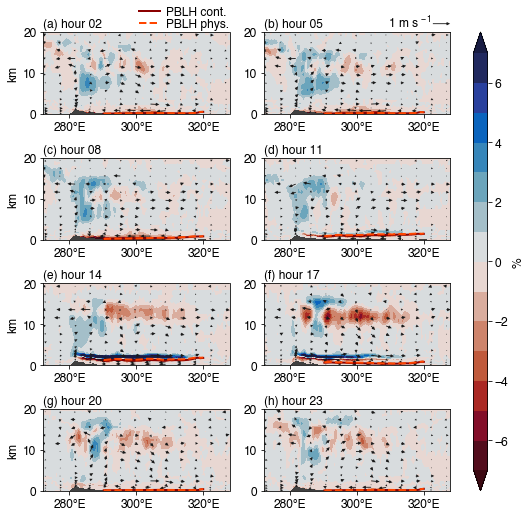

In [90]:
fontsize=12

fig = mp.figure(figsize=(6.5,7))

y_zero = numpy.zeros(xlong.shape[1])
levels = numpy.arange(-7,7.1,1)

xticks_deg_E=numpy.array((280,300,320))
xticks = -(360-xticks_deg_E)
xticks_format=[str(tick)+DEGREE_SIGN+'E' for tick in xticks_deg_E]

every_nth_lon=10
every_nth_z=1
z_indices=[1,5]+[i for i in range(7,29,2)]
quiver_scale = .2 # 0.05 for 850-600, 0.1 for below 850
quiver_shaft_width = .25#.75
quiver_key_scale = 1
quiver_color = '0.1'
quiver_head_width = quiver_shaft_width*15
quiver_head_length = quiver_shaft_width*15

nrows=4;ncols=2
ax_list = []

for t in range(8):
    ax = fig.add_subplot(nrows,ncols,t+1)#, projection=cartopy.crs.PlateCarree())
    
    contour_plot = ax.contourf(xx+360.,\
                               geopot_400_lat_mean[0,:,:]/(g*1000.),\
                               cldfra_diffs_array[t]*100.,\
                               levels=levels,\
                               cmap=cmocean.cm.balance_r,\
                               extend='both')
    
    quiver_plot = ax.quiver(xx[z_indices,::every_nth_lon]+360.,\
              geopot_400_lat_mean[0,z_indices,::every_nth_lon]/(g*1000.),\
              ua_diffs_array[t][z_indices,::every_nth_lon],\
              wa_diffs_array[t][z_indices,::every_nth_lon]*100.,\
              units='xy', scale=quiver_scale, \
              color=quiver_color, zorder=3, \
              width=quiver_shaft_width, headwidth=quiver_head_width,\
              headlength=quiver_head_length)
    if t==1:
        quiver_plot_for_key = quiver_plot

    ax.plot(xx[0,:]+360.,pblh_400_array[t]/1000.,c='darkred', label='PBLH cont.', zorder=3, lw=2)
    ax.plot(xx[0,:]+360.,pblh_1000_array[t]/1000.,c='orangered',ls='--', label='PBLH phys.', zorder=3, lw=2)

    ax.tick_params(labelsize=fontsize)
    ax.set_ylim(0,20)
    ax.set_xlim(xlong.min()+67.+360.,xlong.max()+360.-7.)
    
    #ax.set_yticks([0,1,2,3])
    ax.set_xticks([280,300,320])
    ax.set_xticklabels(xticks_format)
    if t in [0,2,4,6]:
        ax.set_ylabel('km', fontsize=fontsize)
    
    ax.text(s='('+string.ascii_lowercase[t]+') hour '+hour_strings_local[t], x=0, y=1.02,\
            transform=ax.transAxes,fontsize=fontsize,ha='left',va='bottom')
    
    ax.set_facecolor('0.25')
    ax_list.append(ax)

fig.tight_layout(h_pad=2)

top_pos = ax_list[1].get_position()
bottom_pos = ax_list[7].get_position()
cbar_axes = fig.add_axes([bottom_pos.x1+0.05, bottom_pos.y0, 0.03, top_pos.y1-bottom_pos.y0])
cbar = mp.colorbar(contour_plot, orientation='vertical', cax=cbar_axes)
cbar_axes.tick_params(labelsize=fontsize)
cbar.set_label('%', fontsize=fontsize)

handles, labels = ax_list[0].get_legend_handles_labels()
legend = ax_list[0].legend(handles, labels, fontsize=fontsize, ncol=1, bbox_to_anchor=(1,1.02), \
                   edgecolor='None', facecolor='None', fancybox=False, bbox_transform=ax_list[0].transAxes, \
                   loc='lower right', labelspacing=0, \
                   borderaxespad=0, borderpad=0, handlelength=1.75, \
                   handletextpad=0.5)

quiver_key = ax_list[1].quiverkey(quiver_plot_for_key, \
                                  coordinates='axes', \
                                  X=1, Y=1.1, labelpos='E', \
                                  label='', \
                                  U=quiver_key_scale)
quiver_key_text = ax_list[1].text(s=str(quiver_key_scale)+' m s$^{\,-1}$',\
                                  x=0.9, y=1.02,\
                                  ha='right', va='bottom',\
                                  transform=ax_list[1].transAxes, \
                                  fontsize=fontsize)

fig.savefig('manuscript_figureXX_cldfra_pblh_cross_sections_upto10km.png', dpi=600, bbox_inches='tight')

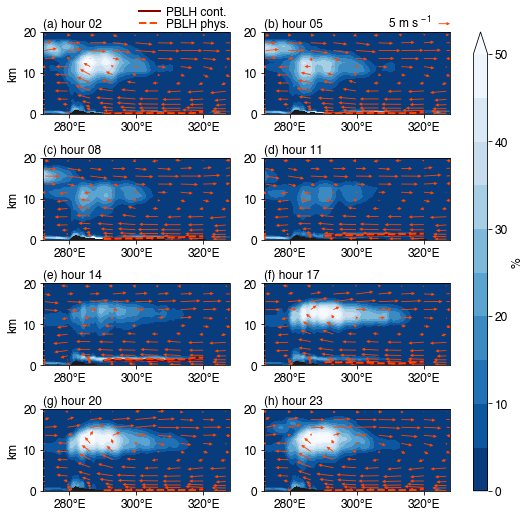

In [119]:
fontsize=12

fig = mp.figure(figsize=(6.5,7))

y_zero = numpy.zeros(xlong.shape[1])
levels = numpy.arange(0,51,5)

xticks_deg_E=numpy.array((280,300,320))
xticks = -(360-xticks_deg_E)
xticks_format=[str(tick)+DEGREE_SIGN+'E' for tick in xticks_deg_E]

every_nth_lon=15
every_nth_z=1
z_indices=[1,5]+[i for i in range(7,29,2)]
quiver_scale = 1.5 # 0.05 for 850-600, 0.1 for below 850
quiver_shaft_width = .25#.75
quiver_key_scale = 5
quiver_color = 'orangered'
quiver_head_width = quiver_shaft_width*15

nrows=4;ncols=2
ax_list = []

for t in range(8):
    ax = fig.add_subplot(nrows,ncols,t+1)#, projection=cartopy.crs.PlateCarree())
    
    contour_plot = ax.contourf(xx+360.,\
                               geopot_400_lat_mean[0,:,:]/(g*1000.),\
                               cldfra_400_array[t]*100.,\
                               levels=levels,\
                               cmap='Blues_r',
                               extend='max')
    
    quiver_plot = ax.quiver(xx[z_indices,::every_nth_lon]+360.,\
              geopot_400_lat_mean[0,z_indices,::every_nth_lon]/(g*1000.),\
              ua_400_array[t][z_indices,::every_nth_lon],\
              wa_400_array[t][z_indices,::every_nth_lon]*100.,\
              units='xy', scale=quiver_scale, \
              color=quiver_color, zorder=3, \
              width=quiver_shaft_width, headwidth=quiver_head_width,\
              headlength=quiver_head_length)
    if t==1:
        quiver_plot_for_key = quiver_plot

    ax.plot(xx[0,:]+360.,pblh_400_array[t]/1000.,c='darkred', label='PBLH cont.', zorder=3, lw=2)
    ax.plot(xx[0,:]+360.,pblh_1000_array[t]/1000.,c='orangered',ls='--', label='PBLH phys.', zorder=3, lw=2)

    ax.tick_params(labelsize=fontsize)
    ax.set_ylim(0,20)
    ax.set_xlim(xlong.min()+67.+360.,xlong.max()+360.-7.)
    
    #ax.set_yticks([0,1,2,3])
    ax.set_xticks([280,300,320])
    ax.set_xticklabels(xticks_format)
    if t in [0,2,4,6]:
        ax.set_ylabel('km', fontsize=fontsize)
    
    ax.text(s='('+string.ascii_lowercase[t]+') hour '+hour_strings_local[t], x=0, y=1.02,\
            transform=ax.transAxes,fontsize=fontsize,ha='left',va='bottom')
    
    ax.set_facecolor('0.25')
    ax_list.append(ax)

fig.tight_layout(h_pad=2)

top_pos = ax_list[1].get_position()
bottom_pos = ax_list[7].get_position()
cbar_axes = fig.add_axes([bottom_pos.x1+0.05, bottom_pos.y0, 0.03, top_pos.y1-bottom_pos.y0])
cbar = mp.colorbar(contour_plot, orientation='vertical', cax=cbar_axes)
cbar_axes.tick_params(labelsize=fontsize)
cbar.set_label('%', fontsize=fontsize)

handles, labels = ax_list[0].get_legend_handles_labels()
legend = ax_list[0].legend(handles, labels, fontsize=fontsize, ncol=1, bbox_to_anchor=(1,1.02), \
                   edgecolor='None', facecolor='None', fancybox=False, bbox_transform=ax_list[0].transAxes, \
                   loc='lower right', labelspacing=0, \
                   borderaxespad=0, borderpad=0, handlelength=1.75, \
                   handletextpad=0.5)

quiver_key = ax_list[1].quiverkey(quiver_plot_for_key, \
                                  coordinates='axes', \
                                  X=1, Y=1.1, labelpos='E', \
                                  label='', \
                                  U=quiver_key_scale)
quiver_key_text = ax_list[1].text(s=str(quiver_key_scale)+' m s$^{\,-1}$',\
                                  x=0.9, y=1.02,\
                                  ha='right', va='bottom',\
                                  transform=ax_list[1].transAxes, \
                                  fontsize=fontsize)

fig.savefig('manuscript_figureXX_cldfra_CLIMATOLOGY_pblh_cross_sections_upto10km.png', dpi=600, bbox_inches='tight')


# first day

In [152]:
times_to_plot = [12,13,14,15,16,17,18,19]
times_to_plot_local = [8,9,10,11,12,13,14,15]

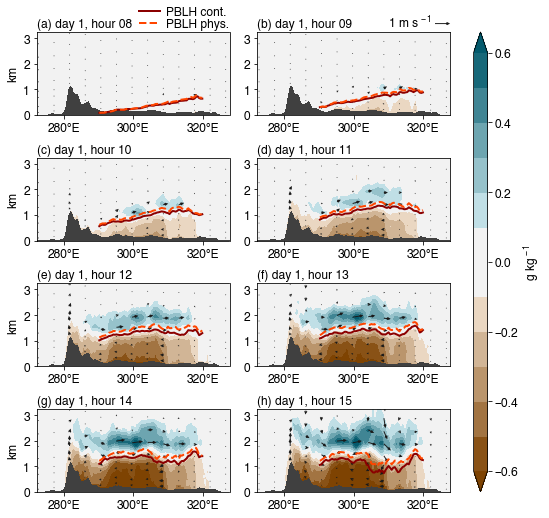

In [186]:
fontsize=12

fig = mp.figure(figsize=(6.5,7))

y_zero = numpy.zeros(xlong.shape[1])
levels = numpy.arange(-0.6,0.61,0.1)

xticks_deg_E=numpy.array((280,300,320))
xticks = -(360-xticks_deg_E)
xticks_format=[str(tick)+DEGREE_SIGN+'E' for tick in xticks_deg_E]

every_nth_lon=10
every_nth_z=1
z_indices=[1,3,5,6,7,8,9,10,11,12,13,14,15,16]
quiver_scale = .25
quiver_shaft_width = .25
quiver_key_scale = 1
quiver_color = '0.1'
quiver_head_width = quiver_shaft_width*13
quiver_head_length = quiver_shaft_width*13

nrows=4;ncols=2
ax_list = []

for t_idx in range(times_to_plot.__len__()):
    t = times_to_plot[t_idx]
    ax = fig.add_subplot(nrows,ncols,t_idx+1)#, projection=cartopy.crs.PlateCarree())
    
    contour_plot = ax.contourf(xx+360.,\
                               geopot_400_lat_mean[0,:,:]/(g*1000.),\
                               qvapor_diffs_lat_mean[t,:,:]*1000.,\
                               levels=levels,\
                               cmap=seaborn.diverging_palette(35, 220, as_cmap=True, s=99, l=35, sep=25),\
                               extend='both')

    quiver_plot = ax.quiver(xx[z_indices,::every_nth_lon]+360.,\
              geopot_400_lat_mean[0,z_indices,::every_nth_lon]/(g*1000.),\
              ua_diffs_lat_mean[t,z_indices,::every_nth_lon],\
              wa_diffs_lat_mean[t,z_indices,::every_nth_lon]*100.,\
              units='xy', scale=quiver_scale, \
              color=quiver_color, zorder=3, \
              width=quiver_shaft_width, headwidth=quiver_head_width,\
              headlength=quiver_head_length)
    
    if t_idx==1:
        quiver_plot_for_key = quiver_plot

    ax.plot(xx[0,:]+360.,pblh_400_lat_mean[t,:]/1000.,c='darkred', label='PBLH cont.', zorder=3, lw=2)
    ax.plot(xx[0,:]+360.,pblh_1000_lat_mean[t,:]/1000.,c='orangered',ls='--', label='PBLH phys.', zorder=3, lw=2)

    ax.tick_params(labelsize=fontsize)
    #ax.set_ylim(1013.25,700)
    ax.set_ylim(0,3.25)
    ax.set_yticks([0,1,2,3])
    ax.set_xlim(xlong.min()+67.+360.,xlong.max()+360.-7.)
    
    #ax.set_yticks([1000,900,800,700])
    ax.set_xticks([280,300,320])
    ax.set_xticklabels(xticks_format)
    if t_idx in [0,2,4,6]:
        ax.set_ylabel('km', fontsize=fontsize)
    
    ax.text(s='('+string.ascii_lowercase[t_idx]+') day 1, hour '+'{:02d}'.format(times_to_plot_local[t_idx]), \
            x=0, y=1.02,\
            transform=ax.transAxes,fontsize=fontsize,ha='left',va='bottom')
    
    ax.set_facecolor('0.25')
    ax_list.append(ax)

fig.tight_layout(h_pad=2)

top_pos = ax_list[1].get_position()
bottom_pos = ax_list[7].get_position()
cbar_axes = fig.add_axes([bottom_pos.x1+0.05, bottom_pos.y0, 0.03, top_pos.y1-bottom_pos.y0])
cbar = mp.colorbar(contour_plot, orientation='vertical', cax=cbar_axes)
cbar_axes.tick_params(labelsize=fontsize)
cbar.set_label('g kg$^{\,-1}$', fontsize=fontsize)

handles, labels = ax_list[0].get_legend_handles_labels()
legend = ax_list[0].legend(handles, labels, fontsize=fontsize, ncol=1, bbox_to_anchor=(1,1.02), \
                   edgecolor='None', facecolor='None', fancybox=False, bbox_transform=ax_list[0].transAxes, \
                   loc='lower right', labelspacing=0, \
                   borderaxespad=0, borderpad=0, handlelength=1.75, \
                   handletextpad=0.5)

quiver_key = ax_list[1].quiverkey(quiver_plot_for_key, \
                                  coordinates='axes', \
                                  X=1, Y=1.1, labelpos='E', \
                                  label='', \
                                  U=quiver_key_scale)
quiver_key_text = ax_list[1].text(s=str(quiver_key_scale)+' m s$^{\,-1}$',\
                                  x=0.9, y=1.02,\
                                  ha='right', va='bottom',\
                                  transform=ax_list[1].transAxes, \
                                  fontsize=fontsize)

fig.savefig('manuscript_figure7_qvapor_pblh_cross_sections_DAY1.png', dpi=600, bbox_inches='tight')

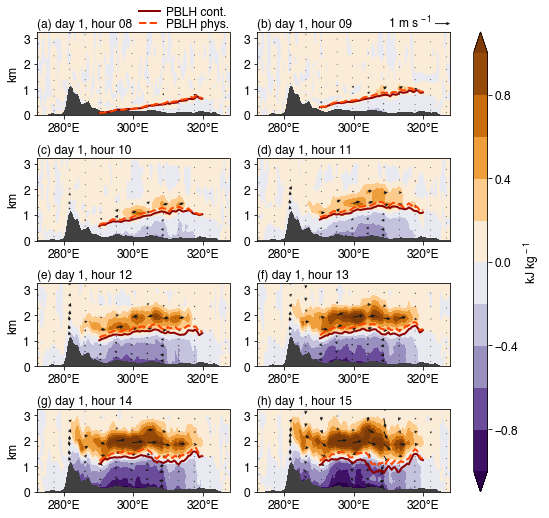

In [185]:
fontsize=12

fig = mp.figure(figsize=(6.5,7))

y_zero = numpy.zeros(xlong.shape[1])
levels = numpy.arange(-1,1.1,0.2)

xticks_deg_E=numpy.array((280,300,320))
xticks = -(360-xticks_deg_E)
xticks_format=[str(tick)+DEGREE_SIGN+'E' for tick in xticks_deg_E]

every_nth_lon=10
every_nth_z=1
z_indices=[1,3,5,6,7,8,9,10,11,12,13,14,15,16]
quiver_scale = .25
quiver_shaft_width = .25
quiver_key_scale = 1
quiver_color = '0.1'
quiver_head_width = quiver_shaft_width*13
quiver_head_length = quiver_shaft_width*13

nrows=4;ncols=2
ax_list = []

for t_idx in range(times_to_plot.__len__()):
    t = times_to_plot[t_idx]
    ax = fig.add_subplot(nrows,ncols,t_idx+1)
    
    contour_plot = ax.contourf(xx+360.,\
                               geopot_400_lat_mean[0,:,:]/(g*1000.),\
                               mse_diffs_lat_mean[t,:,:]/1000.,\
                               levels=levels,\
                               cmap='PuOr_r',\
                               extend='both')

    quiver_plot = ax.quiver(xx[z_indices,::every_nth_lon]+360.,\
              geopot_400_lat_mean[0,z_indices,::every_nth_lon]/(g*1000.),\
              ua_diffs_lat_mean[t,z_indices,::every_nth_lon],\
              wa_diffs_lat_mean[t,z_indices,::every_nth_lon]*100.,\
              units='xy', scale=quiver_scale, \
              color=quiver_color, zorder=3, \
              width=quiver_shaft_width, headwidth=quiver_head_width,\
              headlength=quiver_head_length)
    
    if t_idx==1:
        quiver_plot_for_key = quiver_plot

    ax.plot(xx[0,:]+360.,pblh_400_lat_mean[t,:]/1000.,c='darkred', label='PBLH cont.', zorder=3, lw=2)
    ax.plot(xx[0,:]+360.,pblh_1000_lat_mean[t,:]/1000.,c='orangered',ls='--', label='PBLH phys.', zorder=3, lw=2)

    ax.tick_params(labelsize=fontsize)
    ax.set_ylim(0,3.25)
    ax.set_yticks([0,1,2,3])
    ax.set_xlim(xlong.min()+67.+360.,xlong.max()+360.-7.)
    
    ax.set_xticks([280,300,320])
    ax.set_xticklabels(xticks_format)
    if t_idx in [0,2,4,6]:
        ax.set_ylabel('km', fontsize=fontsize)
    
    ax.text(s='('+string.ascii_lowercase[t_idx]+') day 1, hour '+'{:02d}'.format(times_to_plot_local[t_idx]), \
            x=0, y=1.02,\
            transform=ax.transAxes,fontsize=fontsize,ha='left',va='bottom')
    
    ax.set_facecolor('0.25')
    ax_list.append(ax)

fig.tight_layout(h_pad=2)

top_pos = ax_list[1].get_position()
bottom_pos = ax_list[7].get_position()
cbar_axes = fig.add_axes([bottom_pos.x1+0.05, bottom_pos.y0, 0.03, top_pos.y1-bottom_pos.y0])
cbar = mp.colorbar(contour_plot, orientation='vertical', cax=cbar_axes)
cbar_axes.tick_params(labelsize=fontsize)
cbar.set_label('kJ kg$^{\,-1}$', fontsize=fontsize)

handles, labels = ax_list[0].get_legend_handles_labels()
legend = ax_list[0].legend(handles, labels, fontsize=fontsize, ncol=1, bbox_to_anchor=(1,1.02), \
                   edgecolor='None', facecolor='None', fancybox=False, bbox_transform=ax_list[0].transAxes, \
                   loc='lower right', labelspacing=0, \
                   borderaxespad=0, borderpad=0, handlelength=1.75, \
                   handletextpad=0.5)

quiver_key = ax_list[1].quiverkey(quiver_plot_for_key, \
                                  coordinates='axes', \
                                  X=1, Y=1.1, labelpos='E', \
                                  label='', \
                                  U=quiver_key_scale)
quiver_key_text = ax_list[1].text(s=str(quiver_key_scale)+' m s$^{\,-1}$',\
                                  x=0.9, y=1.02,\
                                  ha='right', va='bottom',\
                                  transform=ax_list[1].transAxes, \
                                  fontsize=fontsize)

fig.savefig('manuscript_figureXX_mse_pblh_cross_sections_DAY1.png', dpi=600, bbox_inches='tight')

# qvapor 20km

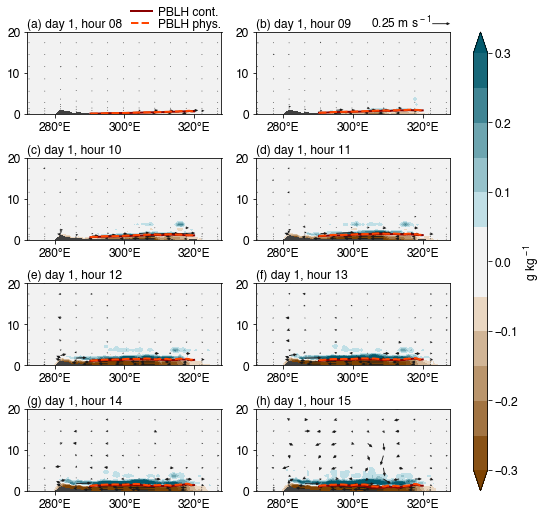

In [72]:
fontsize=12

fig = mp.figure(figsize=(6.5,7))

y_zero = numpy.zeros(xlong.shape[1])
levels = numpy.arange(-0.3,0.31,0.05)

xticks_deg_E=numpy.array((280,300,320))
xticks = -(360-xticks_deg_E)
xticks_format=[str(tick)+DEGREE_SIGN+'E' for tick in xticks_deg_E]

every_nth_lon=10
every_nth_z=1
z_indices=[1,5]+[i for i in range(7,29,3)]
quiver_scale = 0.05
quiver_shaft_width = .25
quiver_key_scale = 0.25
quiver_color = '0.1'
quiver_head_width = quiver_shaft_width*13
quiver_head_length = quiver_shaft_width*13

nrows=4;ncols=2
ax_list = []

for t_idx in range(times_to_plot.__len__()):
    t = times_to_plot[t_idx]
    ax = fig.add_subplot(nrows,ncols,t_idx+1)#, projection=cartopy.crs.PlateCarree())
    
    contour_plot = ax.contourf(xx+360.,\
                               geopot_400_lat_mean[0,:,:]/(g*1000.),\
                               qvapor_diffs_lat_mean[t,:,:]*1000.,\
                               levels=levels,\
                               cmap=seaborn.diverging_palette(35, 220, as_cmap=True, s=99, l=35, sep=25),\
                               extend='both')

    quiver_plot = ax.quiver(xx[z_indices,::every_nth_lon]+360.,\
              geopot_400_lat_mean[0,z_indices,::every_nth_lon]/(g*1000.),\
              ua_diffs_lat_mean[t,z_indices,::every_nth_lon],\
              wa_diffs_lat_mean[t,z_indices,::every_nth_lon]*10.,\
              units='xy', scale=quiver_scale, \
              color=quiver_color, zorder=3, \
              width=quiver_shaft_width, headwidth=quiver_head_width,\
              headlength=quiver_head_length)
    
    if t_idx==1:
        quiver_plot_for_key = quiver_plot

    ax.plot(xx[0,:]+360.,pblh_400_lat_mean[t,:]/1000.,c='darkred', label='PBLH cont.', zorder=3, lw=2)
    ax.plot(xx[0,:]+360.,pblh_1000_lat_mean[t,:]/1000.,c='orangered',ls='--', label='PBLH phys.', zorder=3, lw=2)

    ax.tick_params(labelsize=fontsize)
    #ax.set_ylim(1013.25,700)
    ax.set_ylim(0,20)
    ax.set_xlim(xlong.min()+67.+360.,xlong.max()+360.-7.)
    
    #ax.set_yticks([1000,900,800,700])
    ax.set_xticks([280,300,320])
    ax.set_xticklabels(xticks_format)
    if t in [0,2,4,6]:
        ax.set_ylabel('hPa', fontsize=fontsize)
    
    ax.text(s='('+string.ascii_lowercase[t_idx]+') day 1, hour '+'{:02d}'.format(times_to_plot_local[t_idx]), \
            x=0, y=1.02,\
            transform=ax.transAxes,fontsize=fontsize,ha='left',va='bottom')
    
    ax.set_facecolor('0.25')
    ax_list.append(ax)

fig.tight_layout(h_pad=2)

top_pos = ax_list[1].get_position()
bottom_pos = ax_list[7].get_position()
cbar_axes = fig.add_axes([bottom_pos.x1+0.05, bottom_pos.y0, 0.03, top_pos.y1-bottom_pos.y0])
cbar = mp.colorbar(contour_plot, orientation='vertical', cax=cbar_axes)
cbar_axes.tick_params(labelsize=fontsize)
cbar.set_label('g kg$^{\,-1}$', fontsize=fontsize)

handles, labels = ax_list[0].get_legend_handles_labels()
legend = ax_list[0].legend(handles, labels, fontsize=fontsize, ncol=1, bbox_to_anchor=(1,1.02), \
                   edgecolor='None', facecolor='None', fancybox=False, bbox_transform=ax_list[0].transAxes, \
                   loc='lower right', labelspacing=0, \
                   borderaxespad=0, borderpad=0, handlelength=1.75, \
                   handletextpad=0.5)

quiver_key = ax_list[1].quiverkey(quiver_plot_for_key, \
                                  coordinates='axes', \
                                  X=1, Y=1.1, labelpos='E', \
                                  label='', \
                                  U=quiver_key_scale)
quiver_key_text = ax_list[1].text(s=str(quiver_key_scale)+' m s$^{\,-1}$',\
                                  x=0.9, y=1.02,\
                                  ha='right', va='bottom',\
                                  transform=ax_list[1].transAxes, \
                                  fontsize=fontsize)

fig.savefig('manuscript_figure5_qvapor_pblh_cross_sections_DAY1_upto20km.png', dpi=600, bbox_inches='tight')

# qrain

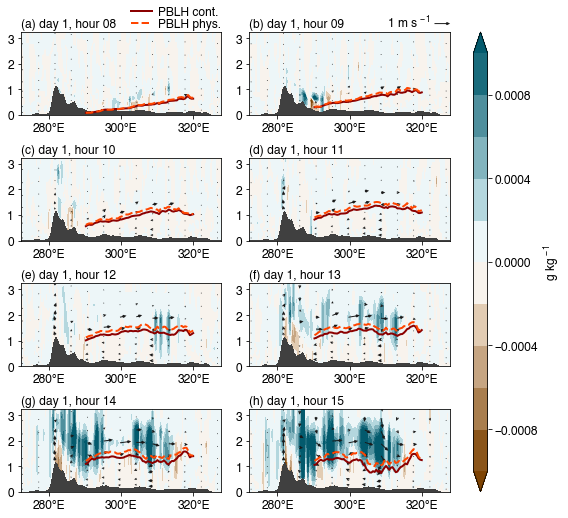

In [154]:
fontsize=12

fig = mp.figure(figsize=(6.5,7))

y_zero = numpy.zeros(xlong.shape[1])
levels = numpy.arange(-0.001,0.0011,0.0002)

xticks_deg_E=numpy.array((280,300,320))
xticks = -(360-xticks_deg_E)
xticks_format=[str(tick)+DEGREE_SIGN+'E' for tick in xticks_deg_E]

every_nth_lon=10
every_nth_z=1
z_indices=[1,3,5,6,7,8,9,10,11,12,13,14,15,16]
quiver_scale = .25
quiver_shaft_width = .25
quiver_key_scale = 1
quiver_color = '0.1'
quiver_head_width = quiver_shaft_width*13
quiver_head_length = quiver_shaft_width*13

nrows=4;ncols=2
ax_list = []

for t_idx in range(times_to_plot.__len__()):
    t = times_to_plot[t_idx]
    ax = fig.add_subplot(nrows,ncols,t_idx+1)#, projection=cartopy.crs.PlateCarree())
    
    contour_plot = ax.contourf(xx+360.,\
                               geopot_400_lat_mean[0,:,:]/(g*1000.),\
                               qrain_diffs_lat_mean[t,:,:]*1000.,\
                               levels=levels,\
                               cmap=seaborn.diverging_palette(35, 220, as_cmap=True, s=99, l=35, sep=25),\
                               extend='both')

    quiver_plot = ax.quiver(xx[z_indices,::every_nth_lon]+360.,\
              geopot_400_lat_mean[0,z_indices,::every_nth_lon]/(g*1000.),\
              ua_diffs_lat_mean[t,z_indices,::every_nth_lon],\
              wa_diffs_lat_mean[t,z_indices,::every_nth_lon]*100.,\
              units='xy', scale=quiver_scale, \
              color=quiver_color, zorder=3, \
              width=quiver_shaft_width, headwidth=quiver_head_width,\
              headlength=quiver_head_length)
    
    if t_idx==1:
        quiver_plot_for_key = quiver_plot

    ax.plot(xx[0,:]+360.,pblh_400_lat_mean[t,:]/1000.,c='darkred', label='PBLH cont.', zorder=3, lw=2)
    ax.plot(xx[0,:]+360.,pblh_1000_lat_mean[t,:]/1000.,c='orangered',ls='--', label='PBLH phys.', zorder=3, lw=2)

    ax.tick_params(labelsize=fontsize)
    #ax.set_ylim(1013.25,700)
    ax.set_ylim(0,3.25)
    ax.set_yticks([0,1,2,3])
    ax.set_xlim(xlong.min()+67.+360.,xlong.max()+360.-7.)
    
    #ax.set_yticks([1000,900,800,700])
    ax.set_xticks([280,300,320])
    ax.set_xticklabels(xticks_format)
    if t in [0,2,4,6]:
        ax.set_ylabel('hPa', fontsize=fontsize)
    
    ax.text(s='('+string.ascii_lowercase[t_idx]+') day 1, hour '+'{:02d}'.format(times_to_plot_local[t_idx]), \
            x=0, y=1.02,\
            transform=ax.transAxes,fontsize=fontsize,ha='left',va='bottom')
    
    ax.set_facecolor('0.25')
    ax_list.append(ax)

fig.tight_layout(h_pad=2)

top_pos = ax_list[1].get_position()
bottom_pos = ax_list[7].get_position()
cbar_axes = fig.add_axes([bottom_pos.x1+0.05, bottom_pos.y0, 0.03, top_pos.y1-bottom_pos.y0])
cbar = mp.colorbar(contour_plot, orientation='vertical', cax=cbar_axes)
cbar_axes.tick_params(labelsize=fontsize)
cbar.set_label('g kg$^{\,-1}$', fontsize=fontsize)

handles, labels = ax_list[0].get_legend_handles_labels()
legend = ax_list[0].legend(handles, labels, fontsize=fontsize, ncol=1, bbox_to_anchor=(1,1.02), \
                   edgecolor='None', facecolor='None', fancybox=False, bbox_transform=ax_list[0].transAxes, \
                   loc='lower right', labelspacing=0, \
                   borderaxespad=0, borderpad=0, handlelength=1.75, \
                   handletextpad=0.5)

quiver_key = ax_list[1].quiverkey(quiver_plot_for_key, \
                                  coordinates='axes', \
                                  X=1, Y=1.1, labelpos='E', \
                                  label='', \
                                  U=quiver_key_scale)
quiver_key_text = ax_list[1].text(s=str(quiver_key_scale)+' m s$^{\,-1}$',\
                                  x=0.9, y=1.02,\
                                  ha='right', va='bottom',\
                                  transform=ax_list[1].transAxes, \
                                  fontsize=fontsize)

fig.savefig('manuscript_figureXX_qrain_pblh_cross_sections_DAY1.png', dpi=600, bbox_inches='tight')

# qcloud

# cldfra

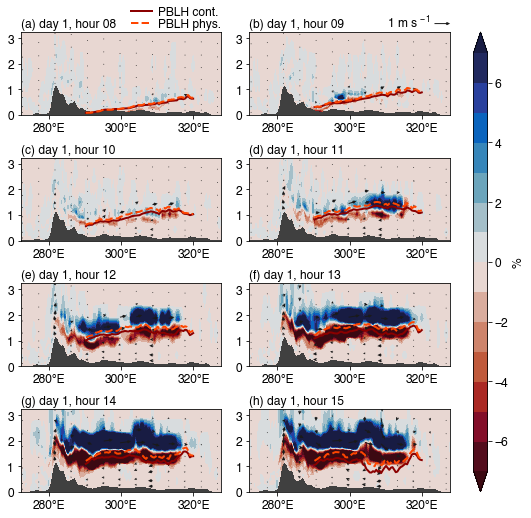

In [91]:
fontsize=12

fig = mp.figure(figsize=(6.5,7))

y_zero = numpy.zeros(xlong.shape[1])
levels = numpy.arange(-7,7.1,1)

xticks_deg_E=numpy.array((280,300,320))
xticks = -(360-xticks_deg_E)
xticks_format=[str(tick)+DEGREE_SIGN+'E' for tick in xticks_deg_E]

every_nth_lon=10
every_nth_z=1
z_indices=[1,3,5,6,7,8,9,10,11,12,13,14,15,16]
quiver_scale = .25
quiver_shaft_width = .25
quiver_key_scale = 1
quiver_color = '0.1'
quiver_head_width = quiver_shaft_width*13
quiver_head_length = quiver_shaft_width*13

nrows=4;ncols=2
ax_list = []

for t_idx in range(times_to_plot.__len__()):
    t = times_to_plot[t_idx]
    ax = fig.add_subplot(nrows,ncols,t_idx+1)#, projection=cartopy.crs.PlateCarree())
    
    contour_plot = ax.contourf(xx+360.,\
                               geopot_400_lat_mean[0,:,:]/10000.,\
                               cldfra_diffs_lat_mean[t,:,:]*100.,\
                               levels=levels,\
                               cmap=cmocean.cm.balance_r,\
                               extend='both')

    quiver_plot = ax.quiver(xx[z_indices,::every_nth_lon]+360.,\
              geopot_400_lat_mean[0,z_indices,::every_nth_lon]/(g*1000.),\
              ua_diffs_lat_mean[t,z_indices,::every_nth_lon],\
              wa_diffs_lat_mean[t,z_indices,::every_nth_lon]*100.,\
              units='xy', scale=quiver_scale, \
              color=quiver_color, zorder=3, \
              width=quiver_shaft_width, headwidth=quiver_head_width,\
              headlength=quiver_head_length)
    
    if t_idx==1:
        quiver_plot_for_key = quiver_plot

    ax.plot(xx[0,:]+360.,pblh_400_lat_mean[t,:]/1000.,c='darkred', label='PBLH cont.', zorder=3, lw=2)
    ax.plot(xx[0,:]+360.,pblh_1000_lat_mean[t,:]/1000.,c='orangered',ls='--', label='PBLH phys.', zorder=3, lw=2)

    ax.tick_params(labelsize=fontsize)
    #ax.set_ylim(1013.25,700)
    ax.set_ylim(0,3.25)
    ax.set_yticks([0,1,2,3])
    ax.set_xlim(xlong.min()+67.+360.,xlong.max()+360.-7.)
    
    #ax.set_yticks([1000,900,800,700])
    ax.set_xticks([280,300,320])
    ax.set_xticklabels(xticks_format)
    if t in [0,2,4,6]:
        ax.set_ylabel('hPa', fontsize=fontsize)
    
    ax.text(s='('+string.ascii_lowercase[t_idx]+') day 1, hour '+'{:02d}'.format(times_to_plot_local[t_idx]), \
            x=0, y=1.02,\
            transform=ax.transAxes,fontsize=fontsize,ha='left',va='bottom')
    
    ax.set_facecolor('0.25')
    ax_list.append(ax)

fig.tight_layout(h_pad=2)

top_pos = ax_list[1].get_position()
bottom_pos = ax_list[7].get_position()
cbar_axes = fig.add_axes([bottom_pos.x1+0.05, bottom_pos.y0, 0.03, top_pos.y1-bottom_pos.y0])
cbar = mp.colorbar(contour_plot, orientation='vertical', cax=cbar_axes)
cbar_axes.tick_params(labelsize=fontsize)
cbar.set_label('%', fontsize=fontsize)

handles, labels = ax_list[0].get_legend_handles_labels()
legend = ax_list[0].legend(handles, labels, fontsize=fontsize, ncol=1, bbox_to_anchor=(1,1.02), \
                   edgecolor='None', facecolor='None', fancybox=False, bbox_transform=ax_list[0].transAxes, \
                   loc='lower right', labelspacing=0, \
                   borderaxespad=0, borderpad=0, handlelength=1.75, \
                   handletextpad=0.5)

quiver_key = ax_list[1].quiverkey(quiver_plot_for_key, \
                                  coordinates='axes', \
                                  X=1, Y=1.1, labelpos='E', \
                                  label='', \
                                  U=quiver_key_scale)
quiver_key_text = ax_list[1].text(s=str(quiver_key_scale)+' m s$^{\,-1}$',\
                                  x=0.9, y=1.02,\
                                  ha='right', va='bottom',\
                                  transform=ax_list[1].transAxes, \
                                  fontsize=fontsize)

fig.savefig('manuscript_figureXX_cldfra_pblh_cross_sections_DAY1.png', dpi=600, bbox_inches='tight')

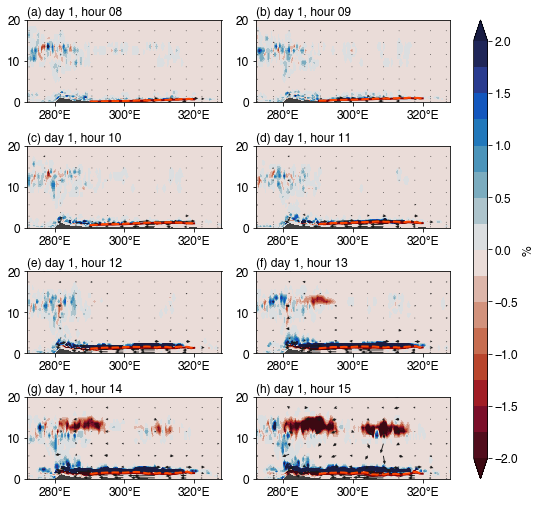

In [88]:
fontsize=12

fig = mp.figure(figsize=(6.5,7))

y_zero = numpy.zeros(xlong.shape[1])
levels = numpy.arange(-2,2.1,0.25)

xticks_deg_E=numpy.array((280,300,320))
xticks = -(360-xticks_deg_E)
xticks_format=[str(tick)+DEGREE_SIGN+'E' for tick in xticks_deg_E]

every_nth_lon=10
every_nth_z=1
z_indices=[1,5]+[i for i in range(7,29,3)]
quiver_scale = .05
quiver_shaft_width = .25
quiver_key_scale = 0.5
quiver_color = '0.1'
quiver_head_width = quiver_shaft_width*13
quiver_head_length = quiver_shaft_width*13

for t_idx in range(times_to_plot.__len__()):
    t = times_to_plot[t_idx]
    ax = fig.add_subplot(nrows,ncols,t_idx+1)#, projection=cartopy.crs.PlateCarree())
    
    contour_plot = ax.contourf(xx+360.,\
                               geopot_400_lat_mean[0,:,:]/(g*1000.),\
                               cldfra_diffs_lat_mean[t,:,:]*100.,\
                               levels=levels,\
                               cmap=cmocean.cm.balance_r,\
                               extend='both')

    quiver_plot = ax.quiver(xx[z_indices,::every_nth_lon]+360.,\
              geopot_400_lat_mean[0,z_indices,::every_nth_lon]/(g*1000.),\
              ua_diffs_lat_mean[t,z_indices,::every_nth_lon],\
              wa_diffs_lat_mean[t,z_indices,::every_nth_lon]*10.,\
              units='xy', scale=quiver_scale, \
              color=quiver_color, zorder=3, \
              width=quiver_shaft_width, headwidth=quiver_head_width,\
              headlength=quiver_head_length)
    
    if t_idx==1:
        quiver_plot_for_key = quiver_plot

    ax.plot(xx[0,:]+360.,pblh_400_lat_mean[t,:]/1000.,c='darkred', label='PBLH cont.', zorder=3, lw=2)
    ax.plot(xx[0,:]+360.,pblh_1000_lat_mean[t,:]/1000.,c='orangered',ls='--', label='PBLH phys.', zorder=3, lw=2)

    ax.tick_params(labelsize=fontsize)
    #ax.set_ylim(1013.25,700)
    ax.set_ylim(0,20)
    ax.set_xlim(xlong.min()+67.+360.,xlong.max()+360.-7.)
    
    ax.set_xticks([280,300,320])
    ax.set_xticklabels(xticks_format)
    if t in [0,2,4,6]:
        ax.set_ylabel('hPa', fontsize=fontsize)
    
    ax.text(s='('+string.ascii_lowercase[t_idx]+') day 1, hour '+'{:02d}'.format(times_to_plot_local[t_idx]), \
            x=0, y=1.02,\
            transform=ax.transAxes,fontsize=fontsize,ha='left',va='bottom')
    
    ax.set_facecolor('0.25')
    ax_list.append(ax)

fig.tight_layout(h_pad=2)

top_pos = ax_list[1].get_position()
bottom_pos = ax_list[7].get_position()
cbar_axes = fig.add_axes([bottom_pos.x1+0.05, bottom_pos.y0, 0.03, top_pos.y1-bottom_pos.y0])
cbar = mp.colorbar(contour_plot, orientation='vertical', cax=cbar_axes)
cbar_axes.tick_params(labelsize=fontsize)
cbar.set_label('%', fontsize=fontsize)

handles, labels = ax_list[0].get_legend_handles_labels()
legend = ax_list[0].legend(handles, labels, fontsize=fontsize, ncol=1, bbox_to_anchor=(1,1.02), \
                   edgecolor='None', facecolor='None', fancybox=False, bbox_transform=ax_list[0].transAxes, \
                   loc='lower right', labelspacing=0, \
                   borderaxespad=0, borderpad=0, handlelength=1.75, \
                   handletextpad=0.5)

quiver_key = ax_list[1].quiverkey(quiver_plot_for_key, \
                                  coordinates='axes', \
                                  X=1, Y=1.1, labelpos='E', \
                                  label='', \
                                  U=quiver_key_scale)
quiver_key_text = ax_list[1].text(s=str(quiver_key_scale)+' m s$^{\,-1}$',\
                                  x=0.9, y=1.02,\
                                  ha='right', va='bottom',\
                                  transform=ax_list[1].transAxes, \
                                  fontsize=fontsize)

fig.savefig('manuscript_figureXX_cldfra_pblh_cross_sections_DAY1_upto20km.png', dpi=600, bbox_inches='tight')

# cldfra on day 1

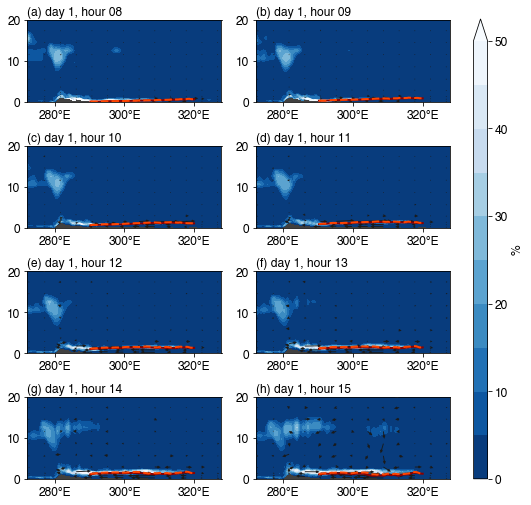

In [188]:
fontsize=12

fig = mp.figure(figsize=(6.5,7))

y_zero = numpy.zeros(xlong.shape[1])
levels = numpy.arange(0,51,5)

xticks_deg_E=numpy.array((280,300,320))
xticks = -(360-xticks_deg_E)
xticks_format=[str(tick)+DEGREE_SIGN+'E' for tick in xticks_deg_E]

every_nth_lon=10
every_nth_z=1
z_indices=[1,5]+[i for i in range(7,29,3)]
quiver_scale = .05
quiver_shaft_width = .25
quiver_key_scale = 0.5
quiver_color = '0.1'
quiver_head_width = quiver_shaft_width*13
quiver_head_length = quiver_shaft_width*13

for t_idx in range(times_to_plot.__len__()):
    t = times_to_plot[t_idx]
    ax = fig.add_subplot(nrows,ncols,t_idx+1)#, projection=cartopy.crs.PlateCarree())
    
    contour_plot = ax.contourf(xx+360.,\
                               geopot_400_lat_mean[0,:,:]/(g*1000.),\
                               cldfra_400_lat_mean[t,:,:]*100.,\
                               levels=levels,\
                               cmap='Blues_r',\
                               extend='max')

    quiver_plot = ax.quiver(xx[z_indices,::every_nth_lon]+360.,\
              geopot_400_lat_mean[0,z_indices,::every_nth_lon]/(g*1000.),\
              ua_diffs_lat_mean[t,z_indices,::every_nth_lon],\
              wa_diffs_lat_mean[t,z_indices,::every_nth_lon]*10.,\
              units='xy', scale=quiver_scale, \
              color=quiver_color, zorder=3, \
              width=quiver_shaft_width, headwidth=quiver_head_width,\
              headlength=quiver_head_length)
    
    if t_idx==1:
        quiver_plot_for_key = quiver_plot

    ax.plot(xx[0,:]+360.,pblh_400_lat_mean[t,:]/1000.,c='darkred', label='PBLH cont.', zorder=3, lw=2)
    ax.plot(xx[0,:]+360.,pblh_1000_lat_mean[t,:]/1000.,c='orangered',ls='--', label='PBLH phys.', zorder=3, lw=2)

    ax.tick_params(labelsize=fontsize)
    #ax.set_ylim(1013.25,700)
    ax.set_ylim(0,20)
    ax.set_xlim(xlong.min()+67.+360.,xlong.max()+360.-7.)
    
    ax.set_xticks([280,300,320])
    ax.set_xticklabels(xticks_format)
    if t in [0,2,4,6]:
        ax.set_ylabel('hPa', fontsize=fontsize)
    
    ax.text(s='('+string.ascii_lowercase[t_idx]+') day 1, hour '+'{:02d}'.format(times_to_plot_local[t_idx]), \
            x=0, y=1.02,\
            transform=ax.transAxes,fontsize=fontsize,ha='left',va='bottom')
    
    ax.set_facecolor('0.25')
    ax_list.append(ax)

fig.tight_layout(h_pad=2)

top_pos = ax_list[1].get_position()
bottom_pos = ax_list[7].get_position()
cbar_axes = fig.add_axes([bottom_pos.x1+0.05, bottom_pos.y0, 0.03, top_pos.y1-bottom_pos.y0])
cbar = mp.colorbar(contour_plot, orientation='vertical', cax=cbar_axes)
cbar_axes.tick_params(labelsize=fontsize)
cbar.set_label('%', fontsize=fontsize)

handles, labels = ax_list[0].get_legend_handles_labels()
legend = ax_list[0].legend(handles, labels, fontsize=fontsize, ncol=1, bbox_to_anchor=(1,1.02), \
                   edgecolor='None', facecolor='None', fancybox=False, bbox_transform=ax_list[0].transAxes, \
                   loc='lower right', labelspacing=0, \
                   borderaxespad=0, borderpad=0, handlelength=1.75, \
                   handletextpad=0.5)

quiver_key = ax_list[1].quiverkey(quiver_plot_for_key, \
                                  coordinates='axes', \
                                  X=1, Y=1.1, labelpos='E', \
                                  label='', \
                                  U=quiver_key_scale)
quiver_key_text = ax_list[1].text(s=str(quiver_key_scale)+' m s$^{\,-1}$',\
                                  x=0.9, y=1.02,\
                                  ha='right', va='bottom',\
                                  transform=ax_list[1].transAxes, \
                                  fontsize=fontsize)

fig.savefig('manuscript_figureXX_cldfra_pblh_cross_sections_CONTROL_DAY1_upto20km.png', dpi=600, bbox_inches='tight')

In [57]:
#seaborn.choose_diverging_palette()
seaborn.choose_colorbrewer_palette('sequential')

interactive(children=(Dropdown(description='name', options=('Greys', 'Reds', 'Greens', 'Blues', 'Oranges', 'Pu…

[(0.9575547866205305, 0.9575547866205305, 0.9575547866205305),
 (0.9012072279892349, 0.9012072279892349, 0.9012072279892349),
 (0.8328950403690888, 0.8328950403690888, 0.8328950403690888),
 (0.7502191464821223, 0.7502191464821223, 0.7502191464821223),
 (0.6434140715109573, 0.6434140715109573, 0.6434140715109573),
 (0.5387158785082661, 0.5387158785082661, 0.5387158785082661),
 (0.440322952710496, 0.440322952710496, 0.440322952710496),
 (0.342883506343714, 0.342883506343714, 0.342883506343714),
 (0.22329873125720878, 0.22329873125720878, 0.22329873125720878),
 (0.10469819300269129, 0.10469819300269129, 0.10469819300269129)]

In [58]:
seaborn.choose_diverging_palette()

interactive(children=(IntSlider(value=220, description='h_neg', max=359), IntSlider(value=10, description='h_p…

[array([0.25199714, 0.49873371, 0.57516028, 1.        ]),
 array([0.43026136, 0.62000665, 0.67878019, 1.        ]),
 array([0.60852558, 0.74127959, 0.7824001 , 1.        ]),
 array([0.7867898 , 0.86255253, 0.88602001, 1.        ]),
 array([0.95, 0.95, 0.95, 1.  ]),
 array([0.95457726, 0.76653099, 0.78032569, 1.        ]),
 array([0.91971827, 0.58735877, 0.61174   , 1.        ]),
 array([0.88485928, 0.40818655, 0.44315432, 1.        ]),
 array([0.85104086, 0.23436275, 0.27960104, 1.        ])]

# temperature plot

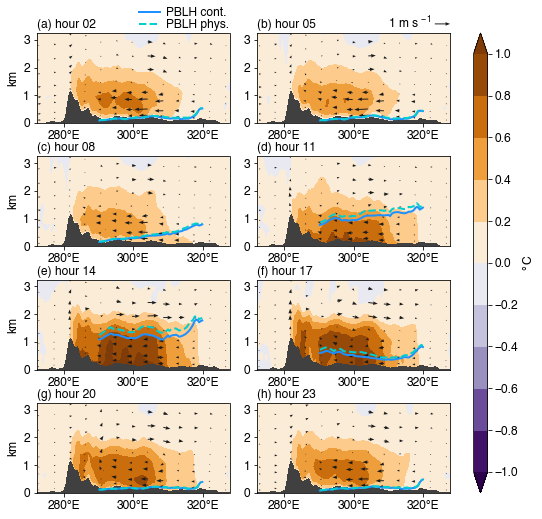

In [65]:
fontsize=12

fig = mp.figure(figsize=(6.5,7))

y_zero = numpy.zeros(xlong.shape[1])
levels = numpy.arange(-1.,1.1,0.2)

xticks_deg_E=numpy.array((280,300,320))
xticks = -(360-xticks_deg_E)
xticks_format=[str(tick)+DEGREE_SIGN+'E' for tick in xticks_deg_E]

every_nth_lon=10
every_nth_z=1
z_indices=[1,3,5,6,7,8,9,10,11,12,13,14,15,16]
quiver_scale = .25 # 0.05 for 850-600, 0.1 for below 850
quiver_shaft_width = .25#.75
quiver_key_scale = 1
quiver_color = '0.1'
quiver_head_width = quiver_shaft_width*15

nrows=4;ncols=2
ax_list = []

for t in range(8):
    ax = fig.add_subplot(nrows,ncols,t+1)#, projection=cartopy.crs.PlateCarree())
    
    contour_plot = ax.contourf(xx+360.,\
                               geopot_400_lat_mean[0,:,:]/(g*1000.),\
                               tk_diffs_array[t],\
                               levels=levels,\
                               cmap='PuOr_r',\
                               extend='both')
    
    quiver_plot = ax.quiver(xx[z_indices,::every_nth_lon]+360.,\
              geopot_400_lat_mean[0,z_indices,::every_nth_lon]/(g*1000.),\
              ua_diffs_array[t][z_indices,::every_nth_lon],\
              wa_diffs_array[t][z_indices,::every_nth_lon]*100.,\
              units='xy', scale=quiver_scale, \
              color=quiver_color, zorder=3, \
              width=quiver_shaft_width, headwidth=quiver_head_width)
    if t==1:
        quiver_plot_for_key = quiver_plot

    ax.plot(xx[0,:]+360.,pblh_400_array[t]/1000.,c='dodgerblue', label='PBLH cont.', zorder=3, lw=2)
    ax.plot(xx[0,:]+360.,pblh_1000_array[t]/1000.,c='darkturquoise',ls='--', label='PBLH phys.', zorder=3, lw=2)

    ax.tick_params(labelsize=fontsize)
    ax.set_ylim(0,3.25)
    ax.set_xlim(xlong.min()+67.+360.,xlong.max()+360.-7.)
    
    ax.set_yticks([0,1,2,3])
    ax.set_xticks([280,300,320])
    ax.set_xticklabels(xticks_format)
    if t in [0,2,4,6]:
        ax.set_ylabel('km', fontsize=fontsize)
    
    ax.text(s='('+string.ascii_lowercase[t]+') hour '+hour_strings_local[t], x=0, y=1.02,\
            transform=ax.transAxes,fontsize=fontsize,ha='left',va='bottom')
    
    ax.set_facecolor('0.25')
    ax_list.append(ax)

fig.tight_layout()

top_pos = ax_list[1].get_position()
bottom_pos = ax_list[7].get_position()
cbar_axes = fig.add_axes([bottom_pos.x1+0.05, bottom_pos.y0, 0.03, top_pos.y1-bottom_pos.y0])
cbar = mp.colorbar(contour_plot, orientation='vertical', cax=cbar_axes)
cbar_axes.tick_params(labelsize=fontsize)
cbar.set_label(DEGREE_SIGN+'$\,$C', fontsize=fontsize)
cbar.set_ticks(levels)

handles, labels = ax_list[0].get_legend_handles_labels()
legend = ax_list[0].legend(handles, labels, fontsize=fontsize, ncol=1, bbox_to_anchor=(1,1.02), \
                   edgecolor='None', facecolor='None', fancybox=False, bbox_transform=ax_list[0].transAxes, \
                   loc='lower right', labelspacing=0, \
                   borderaxespad=0, borderpad=0, handlelength=1.75, \
                   handletextpad=0.5)

quiver_key = ax_list[1].quiverkey(quiver_plot_for_key, \
                                  coordinates='axes', \
                                  X=1, Y=1.1, labelpos='E', \
                                  label='', \
                                  U=quiver_key_scale)
quiver_key_text = ax_list[1].text(s=str(quiver_key_scale)+' m s$^{\,-1}$',\
                                  x=0.9, y=1.02,\
                                  ha='right', va='bottom',\
                                  transform=ax_list[1].transAxes, \
                                  fontsize=fontsize)

fig.savefig('manuscript_figure3supp_tk_pblh_cross_sections.png', dpi=600, bbox_inches='tight')

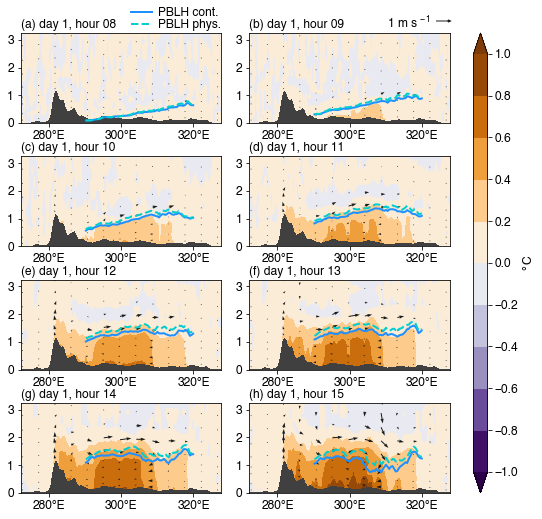

In [83]:
fontsize=12

fig = mp.figure(figsize=(6.5,7))

y_zero = numpy.zeros(xlong.shape[1])
levels = numpy.arange(-1.,1.1,0.2)

xticks_deg_E=numpy.array((280,300,320))
xticks = -(360-xticks_deg_E)
xticks_format=[str(tick)+DEGREE_SIGN+'E' for tick in xticks_deg_E]

every_nth_lon=10
every_nth_z=1
z_indices=[1,3,5,6,7,8,9,10,11,12,13,14,15,16]
quiver_key_scale = 1
quiver_color = '0.1'
quiver_head_width = quiver_shaft_width*13
quiver_head_length = quiver_shaft_width*13

nrows=4;ncols=2
ax_list = []

for t_idx in range(times_to_plot.__len__()):
    t = times_to_plot[t_idx]
    ax = fig.add_subplot(nrows,ncols,t_idx+1)#, projection=cartopy.crs.PlateCarree())
    
    contour_plot = ax.contourf(xx+360.,\
                               geopot_400_lat_mean[0,:,:]/(g*1000.),\
                               tk_diffs_lat_mean[t,:,:],\
                               levels=levels,\
                               cmap='PuOr_r',\
                               extend='both')
    
    quiver_plot = ax.quiver(xx[z_indices,::every_nth_lon]+360.,\
              geopot_400_lat_mean[0,z_indices,::every_nth_lon]/(g*1000.),\
              ua_diffs_lat_mean[t,:,:][z_indices,::every_nth_lon],\
              wa_diffs_lat_mean[t,:,:][z_indices,::every_nth_lon]*100.,\
              units='xy', scale=quiver_scale, \
              color=quiver_color, zorder=3, \
              width=quiver_shaft_width, headwidth=quiver_head_width)
    if t==1:
        quiver_plot_for_key = quiver_plot

    ax.plot(xx[0,:]+360.,pblh_400_lat_mean[t,:]/1000.,c='dodgerblue', label='PBLH cont.', zorder=3, lw=2)
    ax.plot(xx[0,:]+360.,pblh_1000_lat_mean[t,:]/1000.,c='darkturquoise',ls='--', label='PBLH phys.', zorder=3, lw=2)

    ax.tick_params(labelsize=fontsize)
    ax.set_ylim(0,3.25)
    ax.set_xlim(xlong.min()+67.+360.,xlong.max()+360.-7.)
    
    ax.set_yticks([0,1,2,3])
    ax.set_xticks([280,300,320])
    ax.set_xticklabels(xticks_format)
    if t in [0,2,4,6]:
        ax.set_ylabel('km', fontsize=fontsize)
    
    ax.text(s='('+string.ascii_lowercase[t_idx]+') day 1, hour '+'{:02d}'.format(times_to_plot_local[t_idx]), \
            x=0, y=1.02,\
            transform=ax.transAxes,fontsize=fontsize,ha='left',va='bottom')
    
    ax.set_facecolor('0.25')
    ax_list.append(ax)

fig.tight_layout()

top_pos = ax_list[1].get_position()
bottom_pos = ax_list[7].get_position()
cbar_axes = fig.add_axes([bottom_pos.x1+0.05, bottom_pos.y0, 0.03, top_pos.y1-bottom_pos.y0])
cbar = mp.colorbar(contour_plot, orientation='vertical', cax=cbar_axes)
cbar_axes.tick_params(labelsize=fontsize)
cbar.set_label(DEGREE_SIGN+'$\,$C', fontsize=fontsize)
cbar.set_ticks(levels)

handles, labels = ax_list[0].get_legend_handles_labels()
legend = ax_list[0].legend(handles, labels, fontsize=fontsize, ncol=1, bbox_to_anchor=(1,1.02), \
                   edgecolor='None', facecolor='None', fancybox=False, bbox_transform=ax_list[0].transAxes, \
                   loc='lower right', labelspacing=0, \
                   borderaxespad=0, borderpad=0, handlelength=1.75, \
                   handletextpad=0.5)

quiver_key = ax_list[1].quiverkey(quiver_plot_for_key, \
                                  coordinates='axes', \
                                  X=.99, Y=1.1, labelpos='E', \
                                  label='', \
                                  U=quiver_key_scale)
quiver_key_text = ax_list[1].text(s=str(quiver_key_scale)+' m s$^{\,-1}$',\
                                  x=0.9, y=1.02,\
                                  ha='right', va='bottom',\
                                  transform=ax_list[1].transAxes, \
                                  fontsize=fontsize)

fig.savefig('manuscript_figure3supp_tk_pblh_cross_sections_DAY1.png', dpi=600, bbox_inches='tight')